# INN Hotels Project - Supervised Learning: Classification

### Index

- <a href = #link0>Problem Statement</a>
- <a href = #link1>Explore the dataset, Data Preprocessing and extract insights using Exploratory Data Analysis</a>
- <a href = #link2>Questions on Exploratory Data Analysis(EDA)</a>
- <a href = #link3>Building a Logistic Regression model</a>
- <a href = #link4>Logistic Regression - Model Performance Summary - Train and Test</a>
- <a href = #link5>Building Decision Tree models</a>
- <a href = #link6>Decision tree models - Performance Summary - Train and Test</a>
- <a href = #link7>Actionable Insights and Recommendations</a>

## <a name='link0'>**1. Problem Statement**</a>
#### Context
A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

#### Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

#### Data Dictionary
The data contains the different attributes of customers' booking details:
* Booking_ID: the unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels Group
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

### Importing the required libraries

In [1]:
# Ignore warnings
import warnings as wns
wns.filterwarnings('ignore')

In [2]:
# import the important packages
# library used for data manipulation and analysis
import pandas as pd 
# library used for working with arrays.
import numpy as np 
# library for plots and visualisations
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [3]:
# Removing the limit of number of columns and rows printed
pd.set_option('display.max_columns',None) # Display all columns
pd.set_option('display.max_rows',200)# Display 200 rows.

## <a name='link1'>**2. Explore the dataset, Data Preprocessing and extract insights using Exploratory Data Analysis.**</a>
### Load the input file and understand the structure of the data

In [4]:
#Parser engine to use. The C engine is faster while the python engine is currently more feature-complete.
url = "INNHotelsGroup.csv"
Hotel_df = pd.read_csv(url, engine="python")

In [5]:
# Get the shape of the data.
print(f'The INN Hotel Booking dataframe has {Hotel_df.shape[0]} rows and {Hotel_df.shape[1]} columns.')

The INN Hotel Booking dataframe has 36275 rows and 19 columns.


In [6]:
# Get a sample 10 rows of data using random state = 1 
Hotel_df.sample(n=10, random_state=1)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
30392   INN30393             1               0                     1   
6685    INN06686             2               0                     1   
8369    INN08370             2               0                     2   
2055    INN02056             2               0                     0   
10969   INN10970             1               0                     2   
24881   INN24882             2               0                     3   
28658   INN28659             2               0                     0   
20853   INN20854             2               0                     1   
8501    INN08502             2               0                     0   
1942    INN01943             2               0                     0   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
30392                  0      Not Selected                           0   
6685                   2       Meal Plan 1                           0   
8369                   3       Meal Plan 1                           0   
2055                   2      Not Selected                           0   
10969                  4       Meal Plan 1                           0   
24881                  7       Meal Plan 1                           0   
28658                  3       Meal Plan 2                           0   
20853                  2       Meal Plan 1                           0   
8501                   3       Meal Plan 1                           0   
1942                   2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
30392        Room_Type 1         53          2018              9   
6685         Room_Type 1         63          2018              4   
8369         Room_Type 4         55          2018              9   
2055         Room_Type 1         53          2017             12   
10969        Room_Type 1        245          2018              7   
24881        Room_Type 2        231          2018              8   
28658        Room_Type 1         71          2018              5   
20853        Room_Type 1         66          2017             10   
8501         Room_Type 2         40          2018              1   
1942         Room_Type 1         63          2018              8   

       arrival_date market_segment_type  repeated_guest  \
30392            11              Online               0   
6685             22              Online               0   
8369             11              Online               0   
2055             29              Online               0   
10969             6             Offline               0   
24881             1              Online               0   
28658            10             Offline               0   
20853             9             Offline               0   
8501             14              Online               0   
1942              9              Online               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
30392                             0                                     0   
6685                              0                                     0   
8369                              0                                     0   
2055                              0                                     0   
10969                             0                                     0   
24881                             0                                     0   
28658                             0                                     0   
20853                             0                                     0   
8501                              0                                     0   
1942                              0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
30392               94.32                       0   Not_Canceled  
6685             

#### Observations:
The Hotel Booking DataFrame has 19 columns as mentioned in the Data Dictionary. Data in each row corresponds to the details of each booking, both cancelled and not-cancelled.

In [7]:
# use info() method to print a concise summary of the pandas DataFrame
Hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

#### Observations:
* The ReCell DataFrame has 19 columns - 5 of them are objects, 14 are numeric.
* We can also notice that none of the columns have missing values.

In [8]:
# using the describe() menthod to get the 5 point summary of the numerical columns in the dataframe.
# .T will transponse the table into a readable format with dataframe columns arranged in rows.
Hotel_df.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

#### Observations:
This is the 5 point summary of 14 numerical columns. 
1. For no_of_adults, the mean is 1.8 and median is 2. Note that the IQR is zero, meaning that most of the values in this field is equal to 2.
2. For no_of_children, the mean is 0.1 and median is 0. for more than 80% of the booking there are no children. The maximum value is 10.
3. For no_of_weekend_nights, the mean is 0.8 and median is 1. The IQR is 2 and the maximum value is 7.
4. For no_of_week_nights, the mean is 2.2 and median is 2. The IQR is 2 and the maximum value is 17.
5. For required_car_parking_space, the mean is 0.03 and median is zero, 90% of the customers does not require a car parking space
6. For lead_time, the mean is 85.2 days with a std deviation of 85.9. The median is 57 days. Even though 68% of the customers have booked 3-4 months in advance, we can see outliers that have booked a hotel years in advance.
7. For arrival_year, there are only two values 2017 and 2018. Most of the bookings for this data is for calender year 2018 as the IQR is zero and median is 2018.
8. For arrival_month, the values range from 1 to 12. Since the median (8) is closer to third quantile (10) than first quantile (5), most of the data should be for the months - 8,9 and 10.
9. For arrival_date, values range from 1 to 31. The mean is 15.6 and median is 16.
10. For repeated_guest, the mean is 0.02 and median is zero, 90% of the customers are not repeated guests.
11. For no_of_previous_cancellations, the mean is 0.03 and median is zero, 90% of the customers have zero previous cancellations. The maximum value is 13, so there are outliers who have cancelled significant number of times.
12. For no_of_previous_bookings_not_canceled, the mean is 0.01 and median is zero, 90% of the customers have previous bookings not canceled by the customer prior to the current booking. The maximum value is 58 which points out the outliers.
13. For avg_price_per_room, the mean is 103.4 euros with a std deviation of 35. The median is 99.45 days. The IQR is 40 euros, so 68% of the booking are priced between 80 and 120 euros. Some of the prices are zero (that needs to be investigated) and the maximum is 540 euros.
14. For no_of_special_requests, the mean is 0.6 and median is zero, 50% of the customers have no special requests. The IQR is 1 and the maximum is 5.

In [9]:
# using the describe() menthod to get the 5 point summary 
# using 'include' to inculde "object" and "category" columns in the dataframe.
# .T will transponse the table into a readable format with dataframe columns arranged in rows.
Hotel_df.describe(include='object').T

count unique           top   freq
Booking_ID           36275  36275      INN05595      1
type_of_meal_plan    36275      4   Meal Plan 1  27835
room_type_reserved   36275      7   Room_Type 1  28130
market_segment_type  36275      5        Online  23214
booking_status       36275      2  Not_Canceled  24390

#### Observations:
1. For the column 'Booking_ID', it is the unique for all rows and is not significant for further analysis.
2. For the column 'type_of_meal_plan', it has 4 unique values - The most frequent one is 'Meal Plan 1', with a frequency of 27835.
3. For the column 'room_type_reserved', it has 7 unique values - The most frequent one is 'Room_Type 1', with a frequency of 28130.
4. For the column 'market_segment_type', it has 5 unique values - The most frequent one is 'Online', with a frequency of 23214.
5. For the column 'booking_status', it has two unique values - 'Not_Canceled' and 'Canceled'. 'Not_Canceled' appears more than 'Canceled'.

In [10]:
# let's create a copy of the data to avoid any changes to original data
Hotel_Data = Hotel_df.copy()

### Data Preprocessing

In [11]:
# 'Booking_ID' is unique for all rows and is not significant for further analysis.
Hotel_Data.drop(columns="Booking_ID",axis=1,inplace=True)

There are 14 columns with a numeric data type, but I think only two of them ('lead_time' and 'avg_price_per_room') can be considered as continuous. Rest of the columns can be considersed as categorical.

In [12]:
# hand-picking the list of numerical columns in the dataset.
numeric_cols = ['lead_time','avg_price_per_room']
numeric_cols

['lead_time', 'avg_price_per_room']

In [13]:
# Get the list of category columns in the dataset.
category_cols = []
# for look to find the columns that are not numerical
for col in Hotel_Data.columns.to_list():
    if col not in numeric_cols:
        category_cols.append(col)
category_cols

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'type_of_meal_plan',
 'required_car_parking_space',
 'room_type_reserved',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'market_segment_type',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'no_of_special_requests',
 'booking_status']

#### Missing Value Treatment

In [14]:
# checking for missing value
Hotel_Data.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

#### Observations:
1. There are no missing values in the dataset. But that does not mean there are invalid (or unexpected) values.

Lets look for the hotel bookings with **average price for room as Zero.**

In [15]:
# Create a dataframe for booking with price = zero.
Hotel_Data_Price_Zero = Hotel_Data[Hotel_Data['avg_price_per_room'] == 0]

# Identify the market segments with booking status for zero price
Hotel_Data_Price_Zero[['market_segment_type','booking_status']].value_counts()

market_segment_type  booking_status
Complementary        Not_Canceled      354
Online               Not_Canceled      185
                     Canceled            6
dtype: int64

#### Observations:
1. Since most of the bookings with average price for room as Zero is Complementary, that is expected. Also sometimes there is a chance that online bookings can be free with coupons or reward points.

Lets look at the category columns to see if all the values are expected.

In [16]:
# Get the value counts for category columns.
for col in category_cols:
    print(Hotel_Data[col].value_counts())
    print("-" * 40)

2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64
----------------------------------------
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64
----------------------------------------
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64
----------------------------------------
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
8        62
10       62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64
----------------------------------------
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
----------------------------------------
0    35151
1     1124
Name: required_car_parking_space, dtype: int64
----------------------

#### Observations:
1. The value counts for the categorical columns looks good.

Let's add a numeric column with booking status 'Not Canceled' as 0 and 'Cancelled' as 1.

In [17]:
# Rename the column booking_status as booking_status_desc.
Hotel_Data.rename(columns={'booking_status':'booking_status_desc'},inplace=True)
# Apply the function to update booking status 'Not Canceled' as 0 and 'Cancelled' as 1.
Hotel_Data['booking_status'] = Hotel_Data['booking_status_desc'].apply(lambda x:0 if x == "Not_Canceled" else 1)

In [18]:
# Get a sample 10 rows of data using random state = 1 
Hotel_df.sample(n=10, random_state=1)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
30392   INN30393             1               0                     1   
6685    INN06686             2               0                     1   
8369    INN08370             2               0                     2   
2055    INN02056             2               0                     0   
10969   INN10970             1               0                     2   
24881   INN24882             2               0                     3   
28658   INN28659             2               0                     0   
20853   INN20854             2               0                     1   
8501    INN08502             2               0                     0   
1942    INN01943             2               0                     0   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
30392                  0      Not Selected                           0   
6685                   2       Meal Plan 1                           0   
8369                   3       Meal Plan 1                           0   
2055                   2      Not Selected                           0   
10969                  4       Meal Plan 1                           0   
24881                  7       Meal Plan 1                           0   
28658                  3       Meal Plan 2                           0   
20853                  2       Meal Plan 1                           0   
8501                   3       Meal Plan 1                           0   
1942                   2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
30392        Room_Type 1         53          2018              9   
6685         Room_Type 1         63          2018              4   
8369         Room_Type 4         55          2018              9   
2055         Room_Type 1         53          2017             12   
10969        Room_Type 1        245          2018              7   
24881        Room_Type 2        231          2018              8   
28658        Room_Type 1         71          2018              5   
20853        Room_Type 1         66          2017             10   
8501         Room_Type 2         40          2018              1   
1942         Room_Type 1         63          2018              8   

       arrival_date market_segment_type  repeated_guest  \
30392            11              Online               0   
6685             22              Online               0   
8369             11              Online               0   
2055             29              Online               0   
10969             6             Offline               0   
24881             1              Online               0   
28658            10             Offline               0   
20853             9             Offline               0   
8501             14              Online               0   
1942              9              Online               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
30392                             0                                     0   
6685                              0                                     0   
8369                              0                                     0   
2055                              0                                     0   
10969                             0                                     0   
24881                             0                                     0   
28658                             0                                     0   
20853                             0                                     0   
8501                              0                                     0   
1942                              0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
30392               94.32                       0   Not_Canceled  
6685             

## Exploratory Data Analysis (EDA)

### Univariate Analysis

In [19]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    
# for col in numeric_cols:
#     print("# Display a histogram and boxplot with kde curve for the numeric column '{0}'".format(col))
#     print("histogram_boxplot(Hotel_Data,{0},kde=True)".format(col))
#     print("-" * 40)

In [20]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=60, fontsize=12)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.2f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Starting with the dependent variable booking status

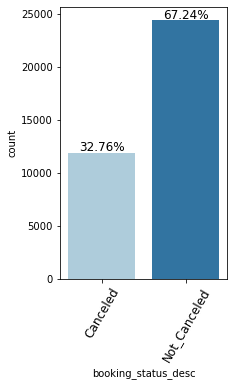

In [21]:
# Display a labeled_barplot for the categorical column 'booking_status'
labeled_barplot(Hotel_Data, 'booking_status_desc', perc=True)

#### Observations:
1. The field booking_status has two unique values - 'Not Canceled' and 'Canceled'.
2. There are 67% of observations with booking status = 'Not Canceled' and 33% of observations with booking status = 'Canceled'

#### Let's look at independent variables

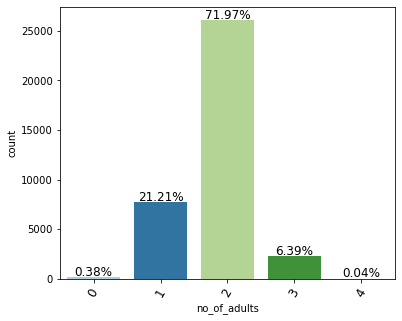

In [22]:
# Display a labeled_barplot for the categorical column 'no_of_adults'
labeled_barplot(Hotel_Data, 'no_of_adults', perc=True)

#### Observations:
1. The field 'no_of_adults' has 5 unique values, 2 adults constitute to 72% of the data.
2. The next frequent is 1 adult with 21%.

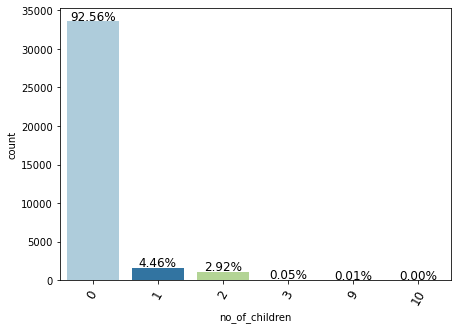

In [23]:
# Display a labeled_barplot for the categorical column 'no_of_children'
labeled_barplot(Hotel_Data, 'no_of_children', perc=True)

#### Observations:
1. The field 'no_of_children' has 6 unique values, Zero children constitute to 92.5% of the data.
2. The next frequent is 1 child with only 4.5%.

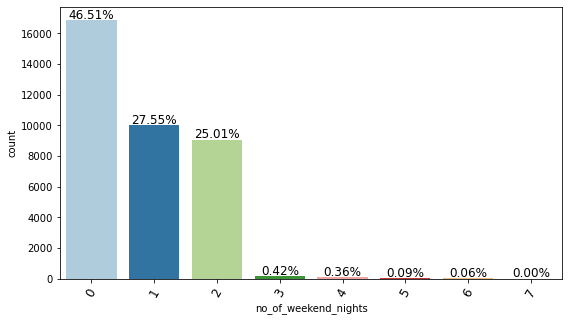

In [24]:
# Display a labeled_barplot for the categorical column 'no_of_weekend_nights'
labeled_barplot(Hotel_Data, 'no_of_weekend_nights', perc=True)

#### Observations:
1. The field 'no_of_weekend_nights' has 8 unique values, Zero weekend nights constitute to 46.5% of the data.
2. The next frequents is 1 and 2 nights with 27.5% and 25% respectiviely.

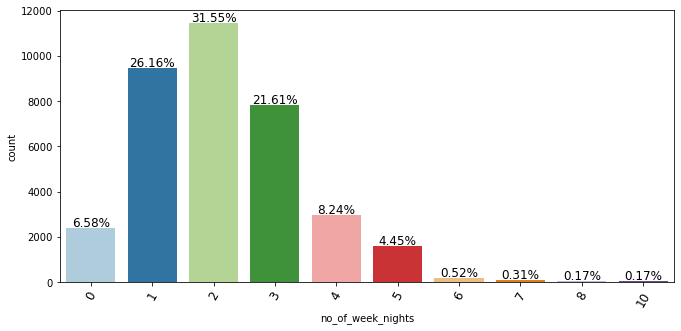

In [25]:
# Display a labeled_barplot for the categorical column 'no_of_week_nights'
labeled_barplot(Hotel_Data, 'no_of_week_nights', perc=True,n=10)

#### Observations:
1. The field 'no_of_week_nights' has 10 unique values, 2 week nights constitute to 31.5% of the data.
2. The next frequents is 1 and 3 nights with 26.1% and 21.6% respectiviely.

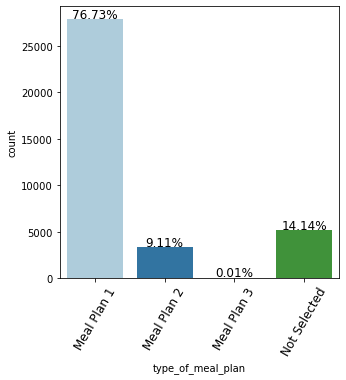

In [26]:
# Display a labeled_barplot for the categorical column 'type_of_meal_plan'
labeled_barplot(Hotel_Data, 'type_of_meal_plan', perc=True)

#### Observations:
1. The field 'type_of_meal_plan' has 4 unique values, Meal Plan 1 constitute to 76.7% of the data.
2. 14% of customers did not select a meal plan.

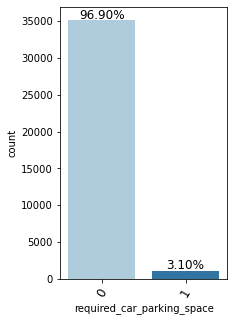

In [27]:
# Display a labeled_barplot for the categorical column 'required_car_parking_space'
labeled_barplot(Hotel_Data, 'required_car_parking_space', perc=True)

#### Observations:
1. The field required_car_parking_space has two unique values - '0' and '1'. (No and Yes)
2. There are 97% of observations with required_car_parking_space = '0' and 3% of observations with required_car_parking_space = '1'

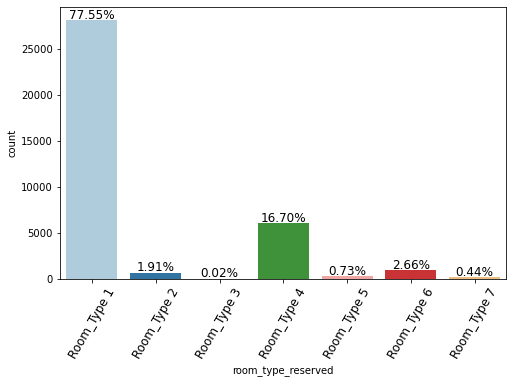

In [28]:
# Display a labeled_barplot for the categorical column 'room_type_reserved'
labeled_barplot(Hotel_Data, 'room_type_reserved', perc=True)

#### Observations:
1. The field 'room_type_reserved' has 7 unique values, Room Type 1 constitute to 78% of the data.
2. 17% of customers opted for Room_Type 4

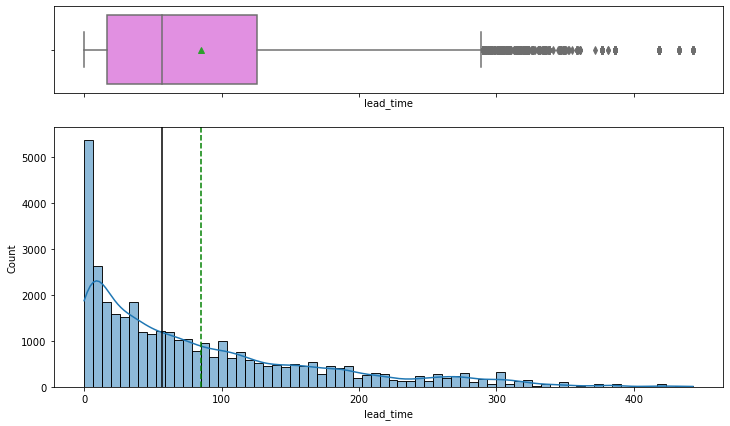

In [29]:
# Display a histogram and boxplot with kde curve for the numeric column 'lead_time'
histogram_boxplot(Hotel_Data,'lead_time',kde=True)

#### Observations:
- There are plenty of outliers in the data as displayed in box plot.
- The mean is greater than median, that indicates the distribution is skewed to the right.
- About 68% of the values for 'lead_time' are from 15 to 130 days.

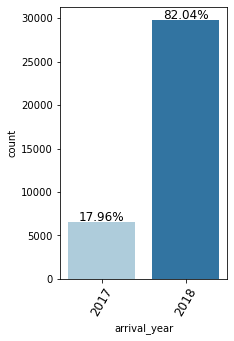

In [30]:
# Display a labeled_barplot for the categorical column 'arrival_year'
labeled_barplot(Hotel_Data, 'arrival_year', perc=True)

#### Observations:
1. The field arrival_year has two unique values - '2017' and '2018'.
2. There are 82% of observations with arrival_year = '2018' and 18% of observations with arrival_year = '2017'

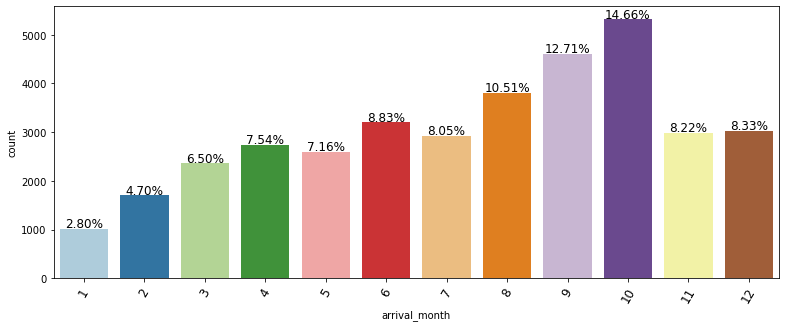

In [31]:
# Display a labeled_barplot for the categorical column 'arrival_month'
labeled_barplot(Hotel_Data, 'arrival_month', perc=True)

#### Observations:
1. The field arrival_month signifies the 12 months in a year.
2. There are 14.7% of observations with arrival_month October, followed by September with 12.7%

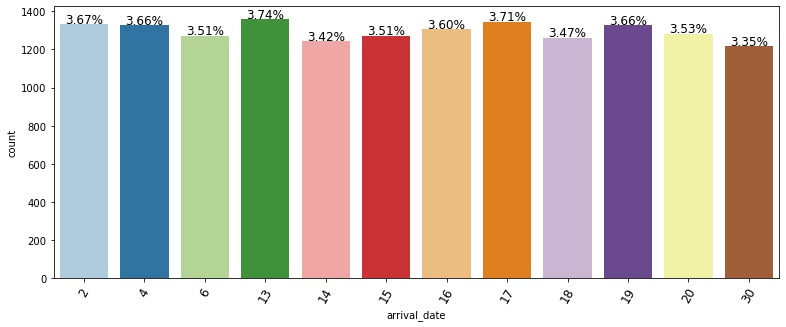

In [32]:
# Display a labeled_barplot for the categorical column 'arrival_date' (Top 12 days)
labeled_barplot(Hotel_Data, 'arrival_date', perc=True,n=12)

#### Observations:
1. The field arrival_date signifies the 31 days in a month.
2. Almost every day contribute 2.5% to 4% of data for this field, an expception being 31 (since there is no 31 in every month).

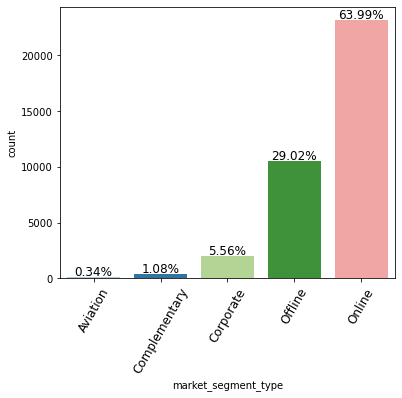

In [33]:
# Display a labeled_barplot for the categorical column 'market_segment_type'
labeled_barplot(Hotel_Data, 'market_segment_type', perc=True)

#### Observations:
1. The field 'market_segment_type' has 5 unique values, Online booking constitute to 64% of the data.
2. 29% of customers opted for Offline booking.

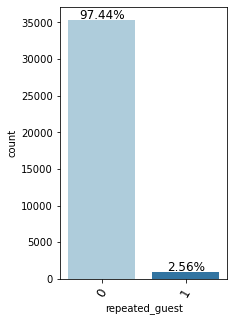

In [34]:
# Display a labeled_barplot for the categorical column 'repeated_guest'
labeled_barplot(Hotel_Data, 'repeated_guest', perc=True)

#### Observations:
1. The field repeated_guest has two unique values - '0' and '1'. (No and Yes)
2. There are 97.4% of observations with repeated_guest = '0' and 3% of observations with repeated_guest = '1'

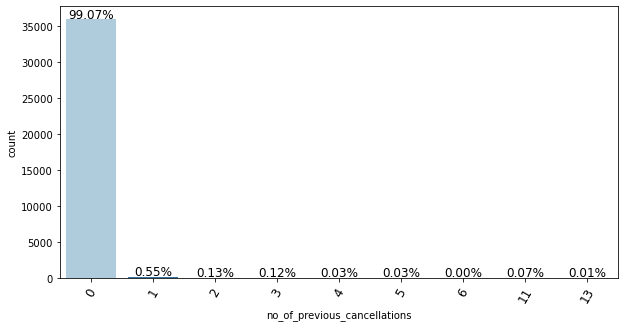

In [35]:
# Display a labeled_barplot for the categorical column 'no_of_previous_cancellations'
labeled_barplot(Hotel_Data, 'no_of_previous_cancellations', perc=True)

#### Observations:
1. The field 'no_of_previous_cancellations' has 9 unique values.
2. 99% of customers have no previous cancellations.

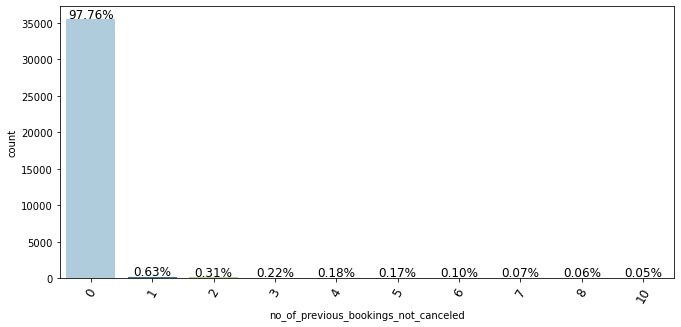

In [36]:
# Display a labeled_barplot for the categorical column 'no_of_previous_bookings_not_canceled'
labeled_barplot(Hotel_Data, 'no_of_previous_bookings_not_canceled', perc=True,n=10)

#### Observations:
1. 97.7% of customers have no previous booking that are not cancelled.

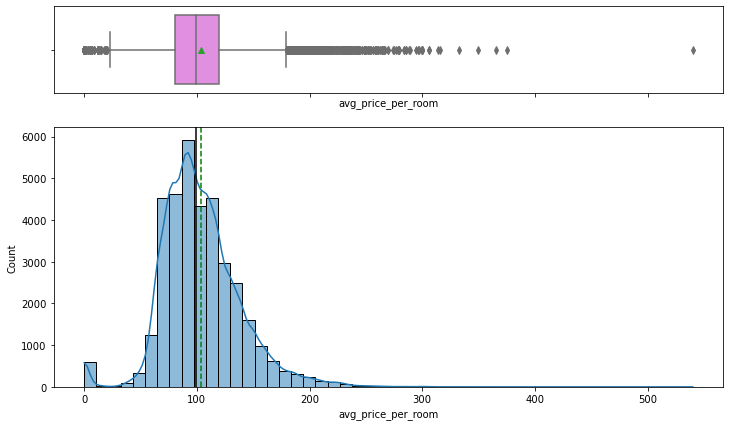

In [37]:
# Display a histogram and boxplot with kde curve for the numeric column 'avg_price_per_room'
histogram_boxplot(Hotel_Data,'avg_price_per_room',kde=True,bins=50)

#### Observations:
- There are plenty of outliers in the data as displayed in box plot.
- The mean is slightly greater than median, that indicates the distribution is a bit skewed to the right.
- About 68% of the values for 'avg_price_per_room' are from 80 to 120 euros.

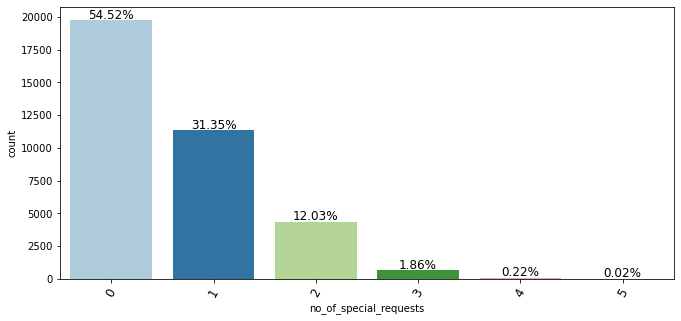

In [38]:
# Display a labeled_barplot for the categorical column 'no_of_special_requests'
labeled_barplot(Hotel_Data, 'no_of_special_requests', perc=True,n=10)

#### Observations:
1. The field 'no_of_special_requests' has 6 unique values, Zero special requests constitute to 54.5% of the data.
2. Remaining 45.5% of customers had atleast one special request.

### Bivariate and Multivariate Analysis

#### Starting with pairplot and heat map of numerical fields

<Figure size 1440x2160 with 0 Axes>

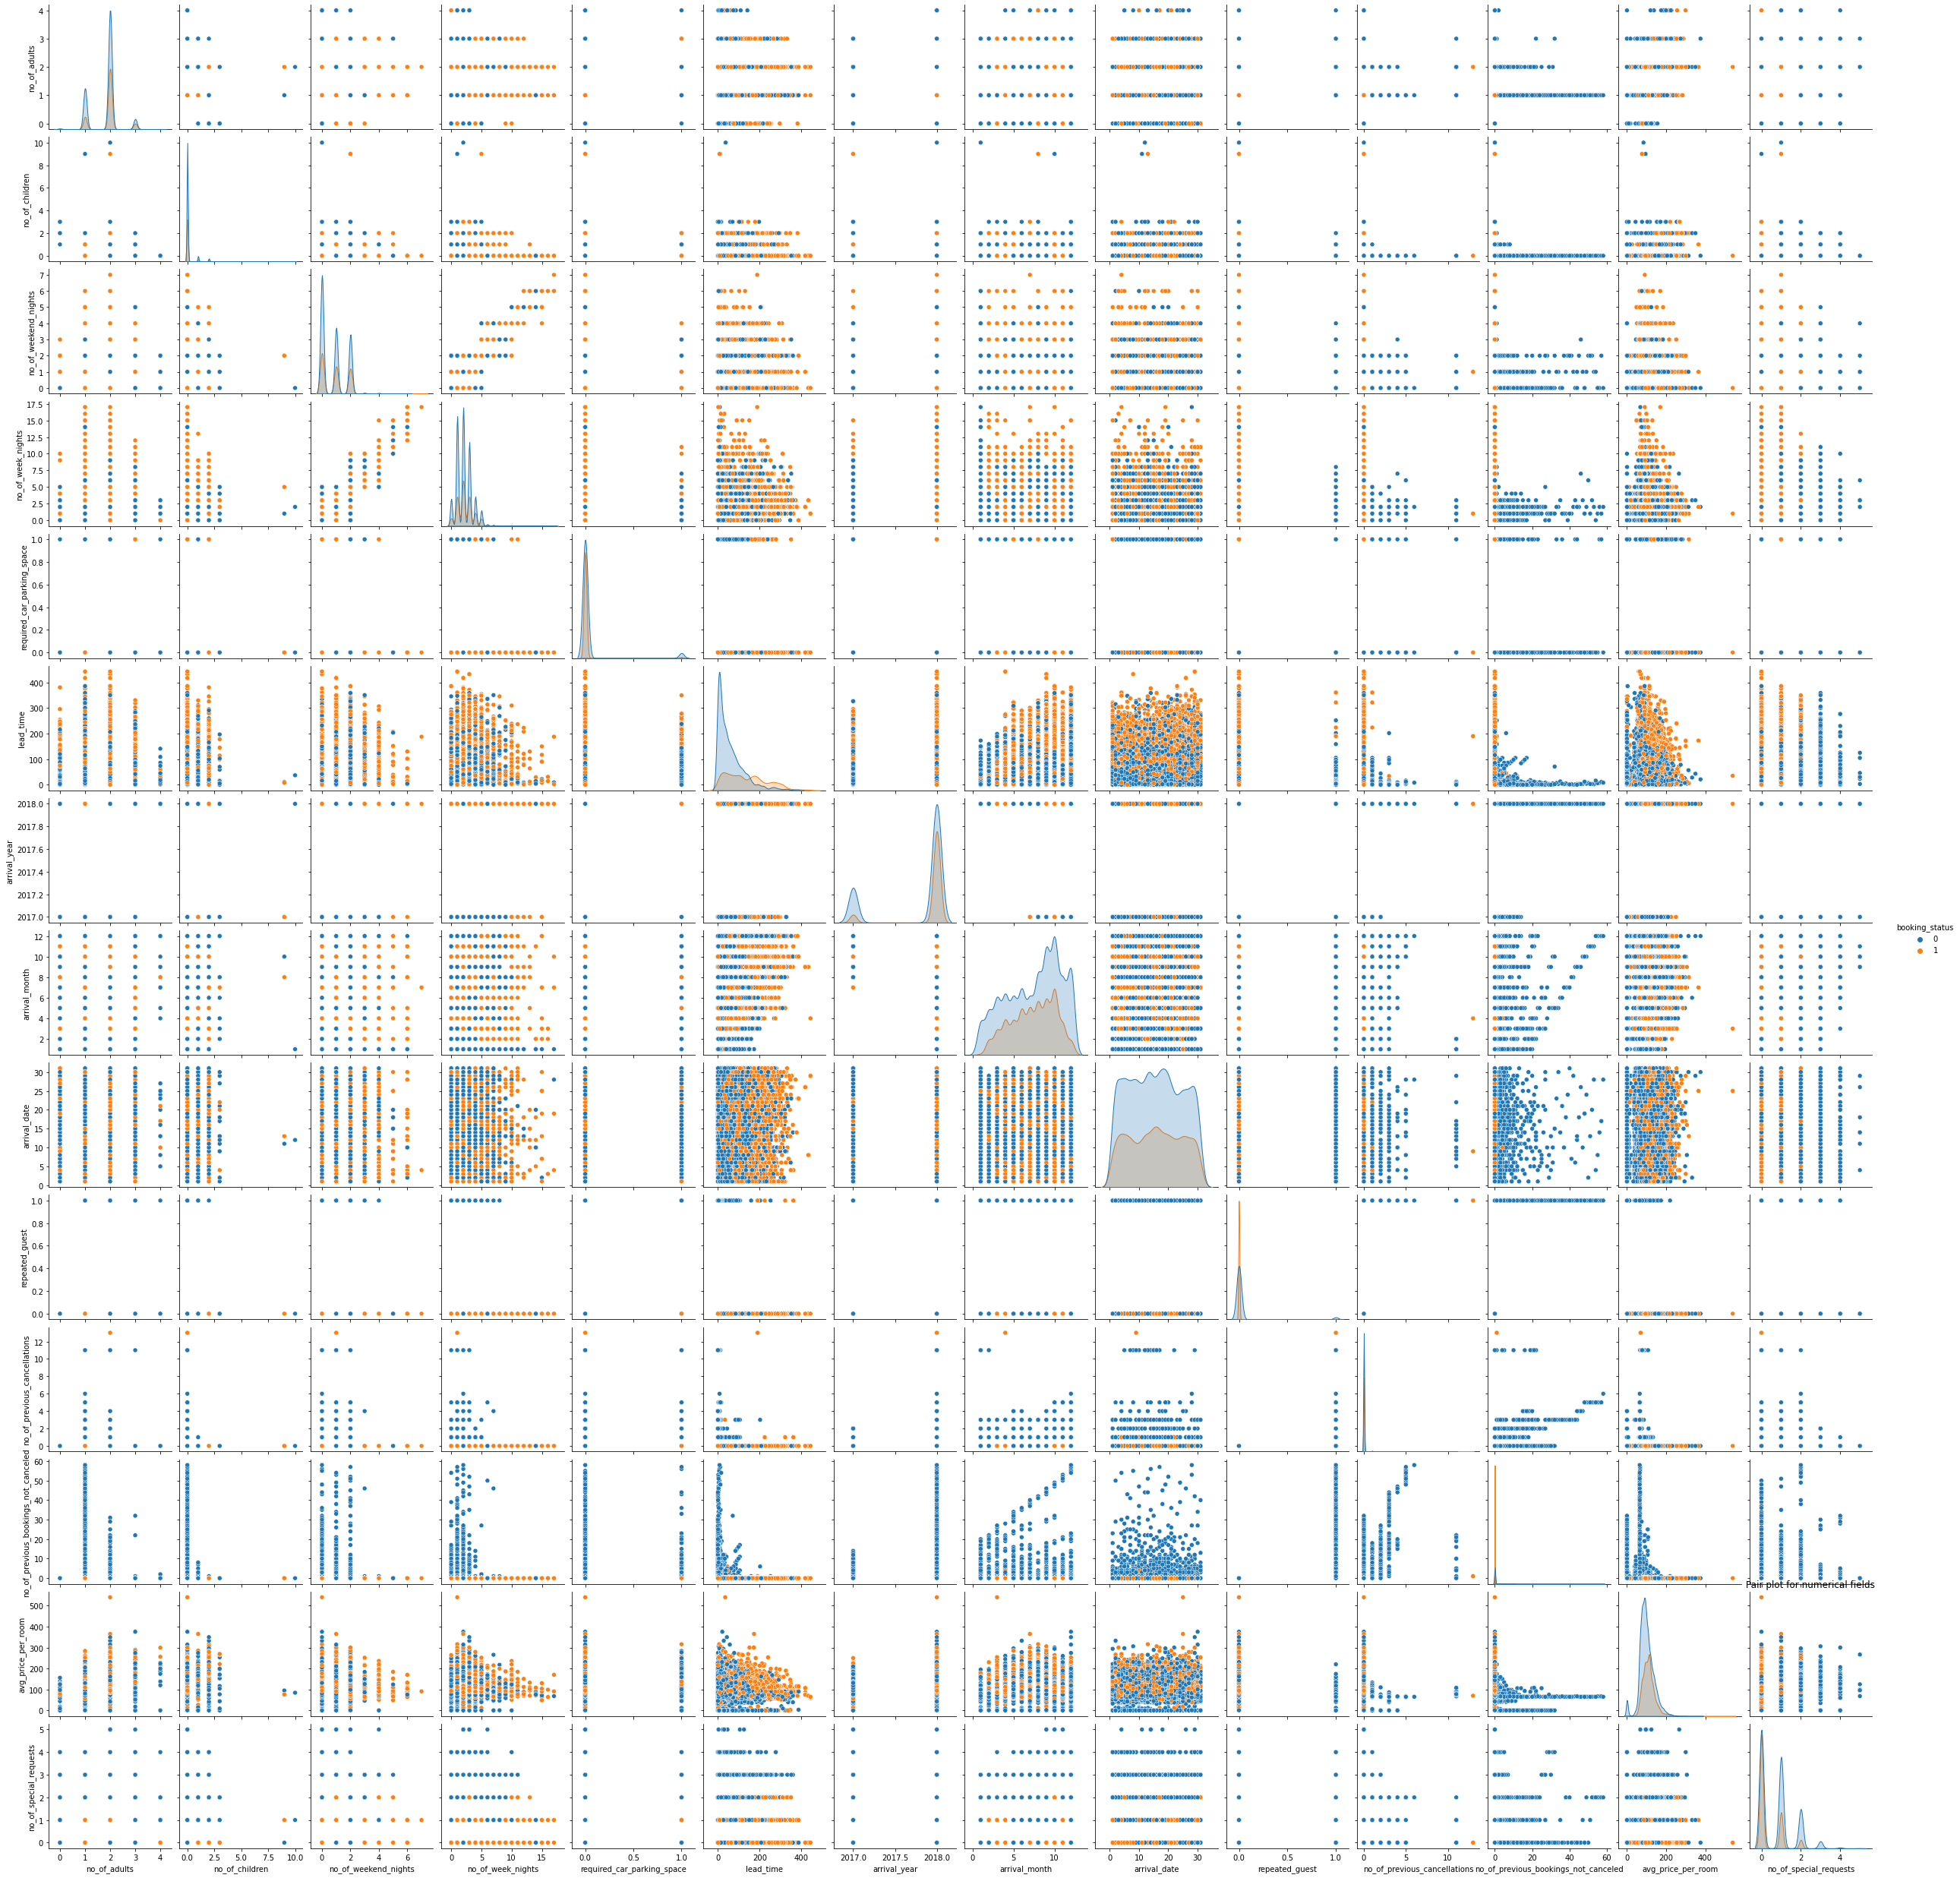

In [39]:
# Display a pair plot to find the relationship between numerical fields.
plt.figure(figsize=(20,30))
sns.pairplot(Hotel_Data,hue='booking_status')

# Set the title for the plot
plt.title('Pair plot for numerical fields')
plt.show()

#### Observations:
1. It is hard to figure anything out of this pairplot. Let's look into the correlation matrix and heatmap.

In [40]:
# Print the correlation between numerical columns.
Hotel_Data.corr().round(3)

no_of_adults  no_of_children  \
no_of_adults                                 1.000          -0.020   
no_of_children                              -0.020           1.000   
no_of_weekend_nights                         0.103           0.029   
no_of_week_nights                            0.106           0.024   
required_car_parking_space                   0.011           0.034   
lead_time                                    0.097          -0.047   
arrival_year                                 0.077           0.046   
arrival_month                                0.022          -0.003   
arrival_date                                 0.026           0.025   
repeated_guest                              -0.192          -0.036   
no_of_previous_cancellations                -0.047          -0.016   
no_of_previous_bookings_not_canceled        -0.119          -0.021   
avg_price_per_room                           0.297           0.338   
no_of_special_requests                       0.189           0.124   
booking_status                               0.087           0.033   

                                      no_of_weekend_nights  no_of_week_nights  \
no_of_adults                                         0.103              0.106   
no_of_children                                       0.029              0.024   
no_of_weekend_nights                                 1.000              0.180   
no_of_week_nights                                    0.180              1.000   
required_car_parking_space                          -0.031             -0.049   
lead_time                                            0.047              0.150   
arrival_year                                         0.055              0.033   
arrival_month                                       -0.010              0.037   
arrival_date                                         0.027             -0.009   
repeated_guest                                      -0.067             -0.100   
no_of_previous_cancellations                        -0.021             -0.030   
no_of_previous_bookings_not_canceled                -0.026             -0.049   
avg_price_per_room                                  -0.005              0.023   
no_of_special_requests                               0.061              0.046   
booking_status                                       0.062              0.093   

                                      required_car_parking_space  lead_time  \
no_of_adults                                               0.011      0.097   
no_of_children                                             0.034     -0.047   
no_of_weekend_nights                                      -0.031      0.047   
no_of_week_nights                                         -0.049      0.150   
required_car_parking_space                                 1.000     -0.066   
lead_time                                                 -0.066      1.000   
arrival_year                                               0.016      0.143   
arrival_month                                             -0.016      0.137   
arrival_date                                              -0.000      0.006   
repeated_guest                                             0.111     -0.136   
no_of_previous_cancellations                               0.027     -0.046   
no_of_previous_bookings_not_canceled                       0.064     -0.078   
avg_price_per_room                                         0.061     -0.063   
no_of_special_requests                                     0.088     -0.102   
booking_status                                            -0.086      0.439   

                                      arrival_year  arrival_month  \
no_of_adults                                 0.077          0.022   
no_of_children                               0.046         -0.003   
no_of_weekend_nights                         0.055         -0.010   
no_of_week_nights                            0.033          0.037   
required_c

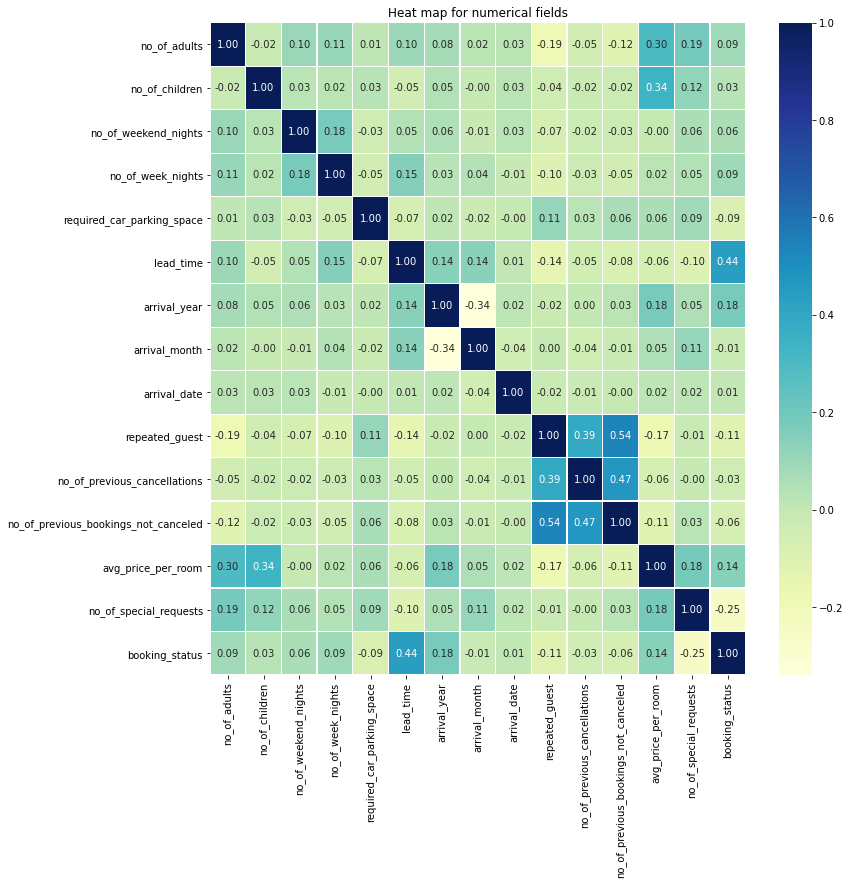

In [41]:
# Set the figure size and title for the plot
plt.figure(figsize=(12,12))
plt.title('Heat map for numerical fields')

# Display a heat map to find the relationship between numerical fields.
sns.heatmap(Hotel_Data.corr(),annot=True,linewidths=0.2,fmt=".2f",cmap="YlGnBu")
plt.show()

#### Observations (as per the heatmap):
1. There is a positive correlation (0.44) between lead_time and booking_status. In other words, the bookings with greater lead time has more chances of getting cancelled.
2. There is a negative correlation (-0.25) between no_of_special_requests and booking_status. Hence the booking with fewer number of special requests are likely to get cancelled.

### Bivariate analysis

In [42]:
### function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [43]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1.head(10))
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab = tab.head(10)
    if count > 10:
        count = 10
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()
    
# for col in category_cols:
#     if col != 'booking_status':
#         print("# This is the stacked barplot for {} with target as Booking status".format(col))
#         print("stacked_barplot(Hotel_Data, '{}', 'booking_status_desc')".format(col))
#         print("-" * 40)

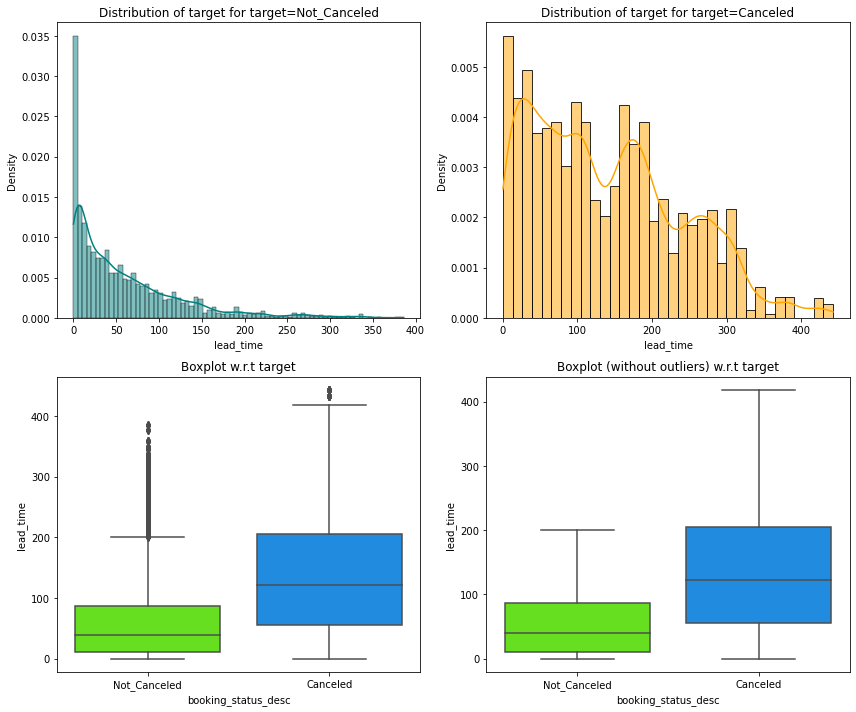

In [44]:
# This is the distribution histplot for lead_time with target as Booking status
distribution_plot_wrt_target(Hotel_Data, 'lead_time', 'booking_status_desc')

#### Observations:
1. As observed in heatmap, booking with higher lead_time has a higher chance of getting cancelled.
2. The median lead_time for a not-cancelled booking is less than 50 days where as the median lead_time for a cancelled booking is more than 100 days.

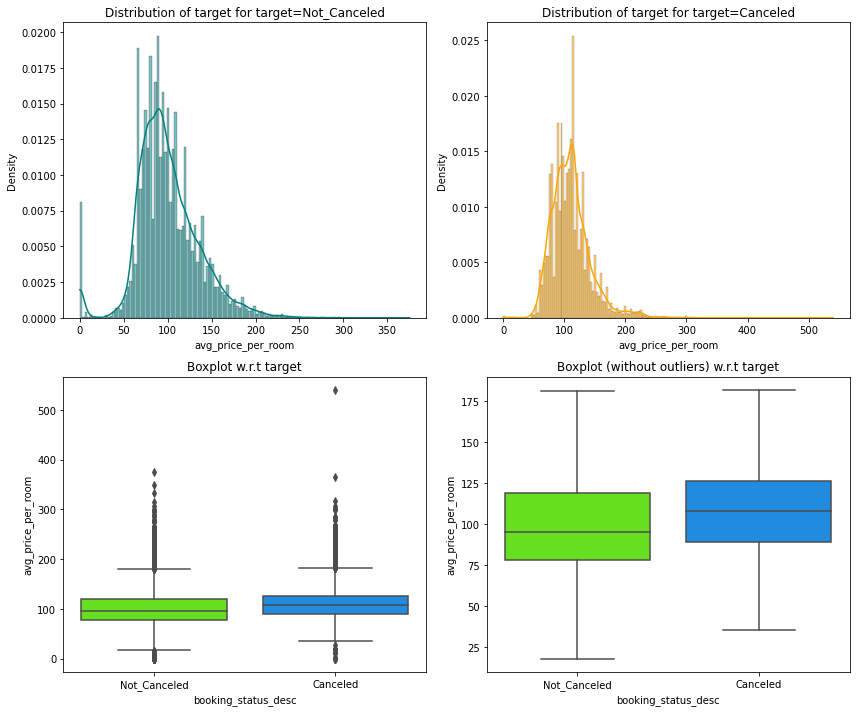

In [45]:
# This is the distribution histplot for avg_price_per_room with target as Booking status
distribution_plot_wrt_target(Hotel_Data, 'avg_price_per_room', 'booking_status_desc')

#### Observations:
1. As observed in heatmap, the average price of the room does not play a major factor in deciding the booking status.
2. Being said that, it can be observed that the median avg room price for a not-cancelled booking is less than 100 euros where as the median avg room price for a cancelled booking is more than 100 euros.

booking_status_desc  Canceled  Not_Canceled    All
no_of_adults                                      
All                     11885         24390  36275
2                        9119         16989  26108
1                        1856          5839   7695
3                         863          1454   2317
0                          44            95    139
4                           3            13     16
------------------------------------------------------------------------------------------------------------------------


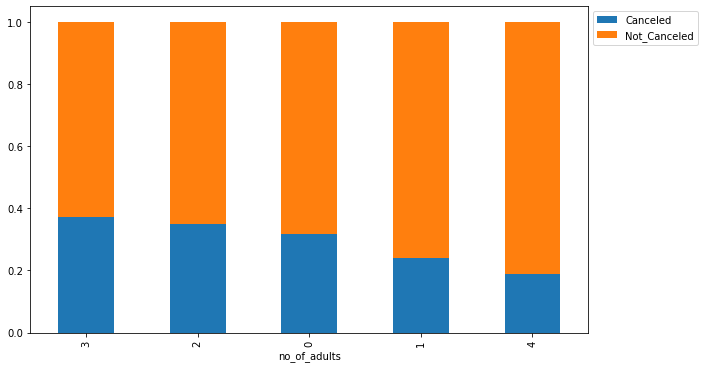

In [46]:
# This is the stacked barplot for no_of_adults with target as Booking status
stacked_barplot(Hotel_Data, 'no_of_adults', 'booking_status_desc')

#### Observations:
1. As observed in heatmap, the no_of_adults does not play a major factor in deciding the booking status.
2. The cancellations are less for no of adults = 4, but the amount of data for no of adults = 4 is very less to make that conclusion.

booking_status_desc  Canceled  Not_Canceled    All
no_of_children                                    
All                     11885         24390  36275
0                       10882         22695  33577
1                         540          1078   1618
2                         457           601   1058
3                           5            14     19
9                           1             1      2
10                          0             1      1
------------------------------------------------------------------------------------------------------------------------


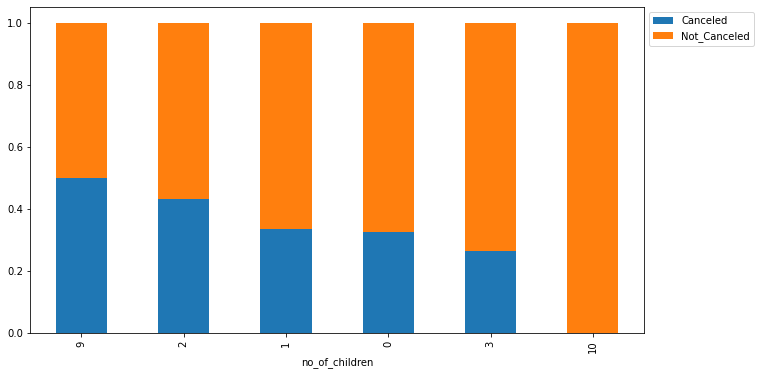

In [47]:
# This is the stacked barplot for no_of_children with target as Booking status
stacked_barplot(Hotel_Data, 'no_of_children', 'booking_status_desc')

#### Observations:
1. As observed in heatmap, the no_of_children does not play a major factor in deciding the booking status.
2. The cancellations are zero for no_of_children = 10, but the there is only one observation for that condition.

booking_status_desc   Canceled  Not_Canceled    All
no_of_weekend_nights                               
All                      11885         24390  36275
0                         5093         11779  16872
1                         3432          6563   9995
2                         3157          5914   9071
4                           83            46    129
3                           74            79    153
5                           29             5     34
6                           16             4     20
7                            1             0      1
------------------------------------------------------------------------------------------------------------------------


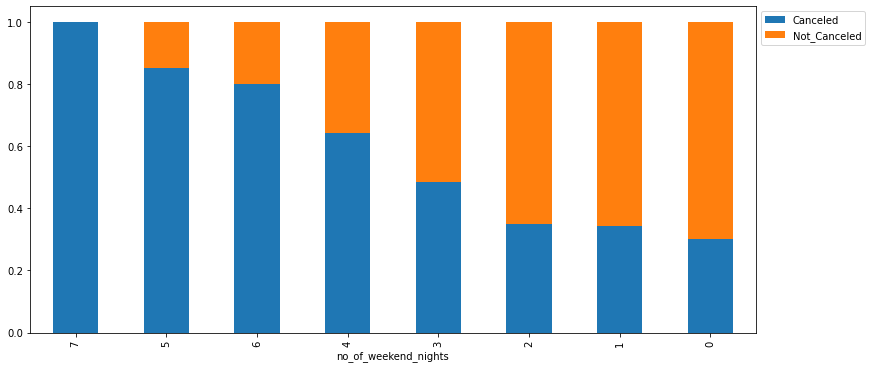

In [48]:
# This is the stacked barplot for no_of_weekend_nights with target as Booking status
stacked_barplot(Hotel_Data, 'no_of_weekend_nights', 'booking_status_desc')

#### Observations:
1. As observed in heatmap, the no_of_weekend_nights does not play a major factor in deciding the booking status.
2. All the booking are cancelled for no_of_weekend_nights = 7, but the there is only one observation for that condition.

booking_status_desc  Canceled  Not_Canceled    All
no_of_week_nights                                 
All                     11885         24390  36275
2                        3997          7447  11444
3                        2574          5265   7839
1                        2572          6916   9488
4                        1143          1847   2990
0                         679          1708   2387
5                         632           982   1614
6                          88           101    189
10                         53             9     62
7                          52            61    113
------------------------------------------------------------------------------------------------------------------------


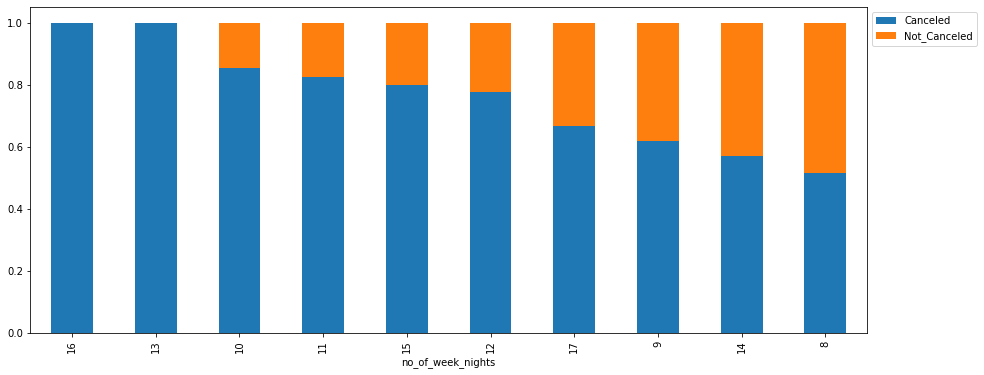

In [49]:
# This is the stacked barplot for no_of_week_nights with target as Booking status
stacked_barplot(Hotel_Data, 'no_of_week_nights', 'booking_status_desc')

#### Observations:
1. As observed in heatmap, the no_of_week_nights does not play a major factor in deciding the booking status.
2. All the booking are cancelled for no_of_week_nights equal to 16 and 13, but the there are not many observations for that condition.

booking_status_desc  Canceled  Not_Canceled    All
type_of_meal_plan                                 
All                     11885         24390  36275
Meal Plan 1              8679         19156  27835
Not Selected             1699          3431   5130
Meal Plan 2              1506          1799   3305
Meal Plan 3                 1             4      5
------------------------------------------------------------------------------------------------------------------------


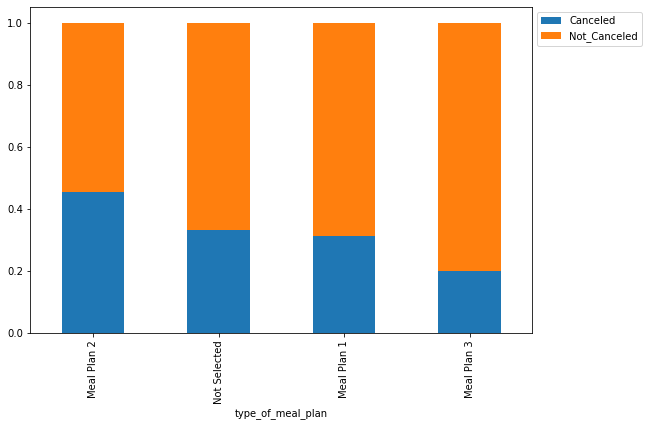

In [50]:
# This is the stacked barplot for type_of_meal_plan with target as Booking status
stacked_barplot(Hotel_Data, 'type_of_meal_plan', 'booking_status_desc')

#### Observations:
1. As observed in heatmap, the type_of_meal_plan does not play a major factor in deciding the booking status.
2. Bookings have less cancellation for type_of_meal_plan equal to 'Meal Plan 3', but the there are only 5 observations for that condition.

booking_status_desc         Canceled  Not_Canceled    All
required_car_parking_space                               
All                            11885         24390  36275
0                              11771         23380  35151
1                                114          1010   1124
------------------------------------------------------------------------------------------------------------------------


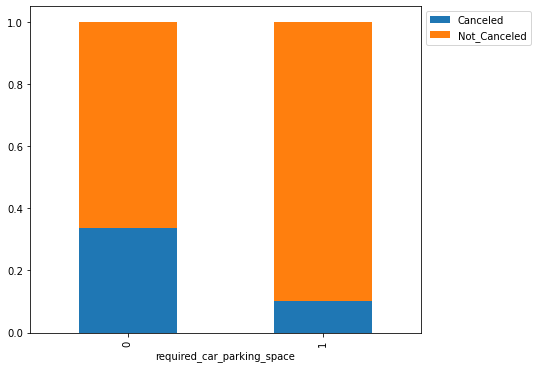

In [51]:
# This is the stacked barplot for required_car_parking_space with target as Booking status
stacked_barplot(Hotel_Data, 'required_car_parking_space', 'booking_status_desc')

#### Observations:
1. As observed in heatmap, the required_car_parking_space does not play a major factor in deciding the booking status.
2. Bookings have less cancellation for required_car_parking_space equal to 'Yes', but the there are only 1124 observations for that condition.

booking_status_desc  Canceled  Not_Canceled    All
room_type_reserved                                
All                     11885         24390  36275
Room_Type 1              9072         19058  28130
Room_Type 4              2069          3988   6057
Room_Type 6               406           560    966
Room_Type 2               228           464    692
Room_Type 5                72           193    265
Room_Type 7                36           122    158
Room_Type 3                 2             5      7
------------------------------------------------------------------------------------------------------------------------


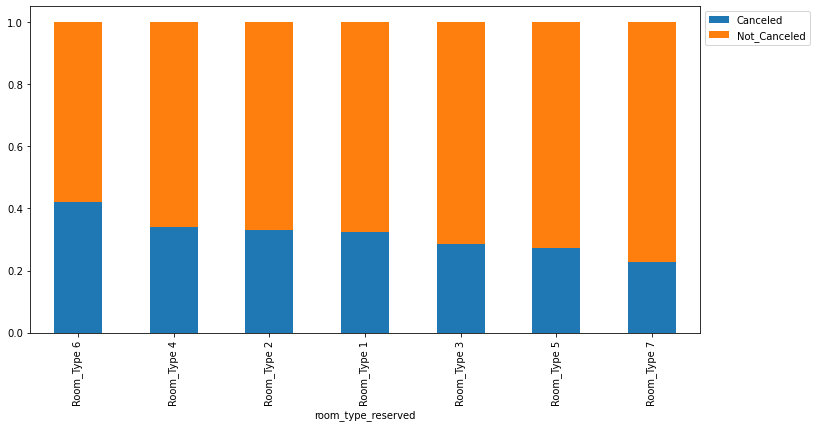

In [52]:
# This is the stacked barplot for room_type_reserved with target as Booking status
stacked_barplot(Hotel_Data, 'room_type_reserved', 'booking_status_desc')

#### Observations:
1. As observed in heatmap, the room_type_reserved does not play a major factor in deciding the booking status.
2. Bookings have less cancellation for Room types 3, 5 and 7, but the there are only a few hunderds of observations for that condition.

booking_status_desc  Canceled  Not_Canceled    All
arrival_year                                      
All                     11885         24390  36275
2018                    10924         18837  29761
2017                      961          5553   6514
------------------------------------------------------------------------------------------------------------------------


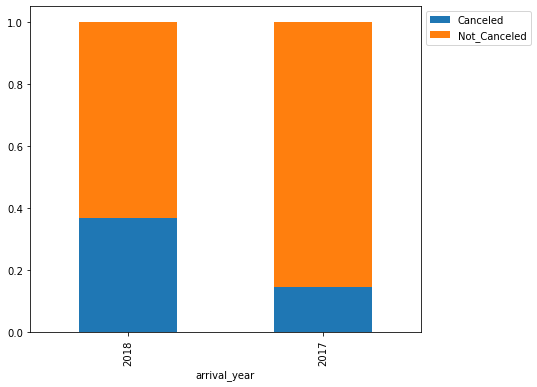

In [53]:
# This is the stacked barplot for arrival_year with target as Booking status
stacked_barplot(Hotel_Data, 'arrival_year', 'booking_status_desc')

#### Observations:
1. As observed in heatmap, the arrival_year does not play a major factor in deciding the booking status.
2. Bookings are less cancelled for calender year 2017, but the number of observations are also less for calender year 2017 compared to 2018.

booking_status_desc  Canceled  Not_Canceled    All
arrival_month                                     
All                     11885         24390  36275
10                       1880          3437   5317
9                        1538          3073   4611
8                        1488          2325   3813
7                        1314          1606   2920
6                        1291          1912   3203
4                         995          1741   2736
5                         948          1650   2598
11                        875          2105   2980
3                         700          1658   2358
------------------------------------------------------------------------------------------------------------------------


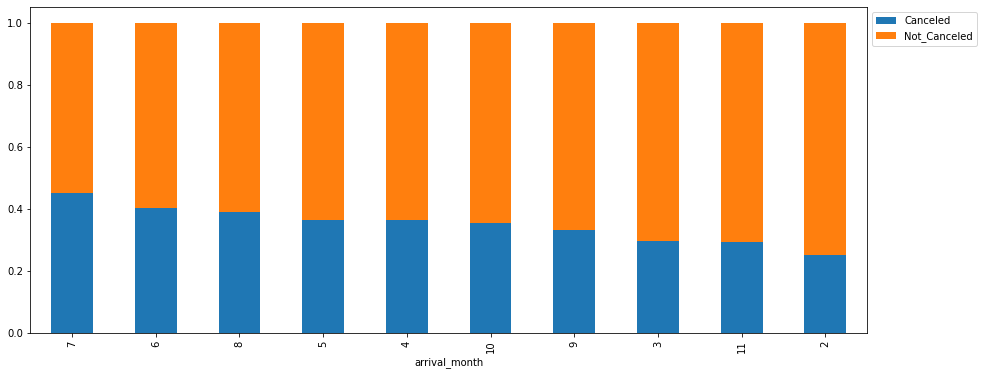

In [54]:
# This is the stacked barplot for arrival_month with target as Booking status
stacked_barplot(Hotel_Data, 'arrival_month', 'booking_status_desc')

#### Observations:
1. As observed in heatmap, the arrival_month does not play a major factor in deciding the booking status.
2. The cancellation of booking for the month is in proportion with the number of bookings for the month.

booking_status_desc  Canceled  Not_Canceled    All
arrival_date                                      
All                     11885         24390  36275
15                        538           735   1273
4                         474           853   1327
16                        473           833   1306
30                        465           751   1216
1                         465           668   1133
12                        460           744   1204
17                        448           897   1345
6                         444           829   1273
26                        425           721   1146
------------------------------------------------------------------------------------------------------------------------


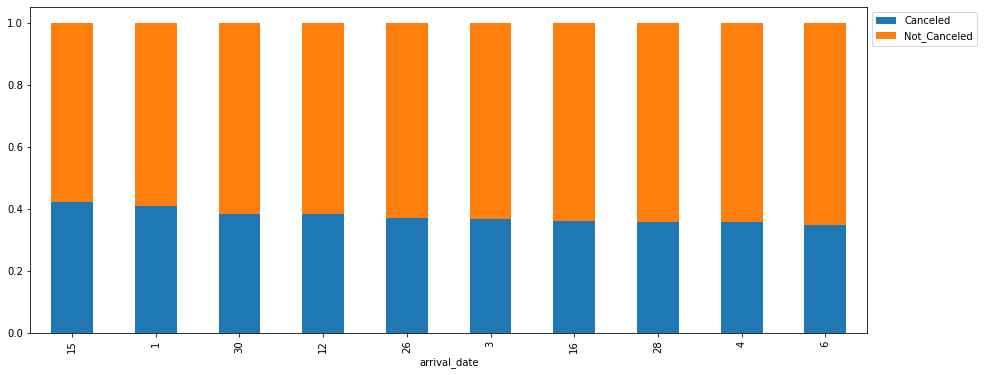

In [55]:
# This is the stacked barplot for arrival_date with target as Booking status
stacked_barplot(Hotel_Data, 'arrival_date', 'booking_status_desc')

#### Observations:
1. As observed in heatmap, the arrival_date does not play a major factor in deciding the booking status.
2. The cancellation of booking for the day is in proportion with the number of bookings for the day.

booking_status_desc  Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


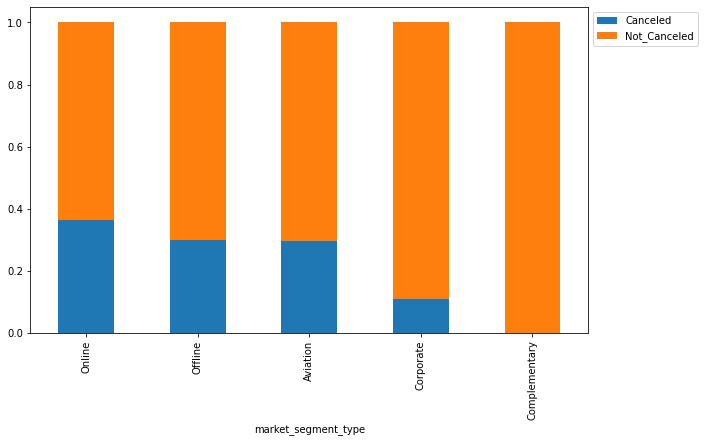

In [56]:
# This is the stacked barplot for market_segment_type with target as Booking status
stacked_barplot(Hotel_Data, 'market_segment_type', 'booking_status_desc')

#### Observations:
1. As observed in heatmap, the market_segment_type has a minor influence in deciding the booking status.
2. None of the complementary bookings are cancelled, which is significant.

booking_status_desc  Canceled  Not_Canceled    All
repeated_guest                                    
All                     11885         24390  36275
0                       11869         23476  35345
1                          16           914    930
------------------------------------------------------------------------------------------------------------------------


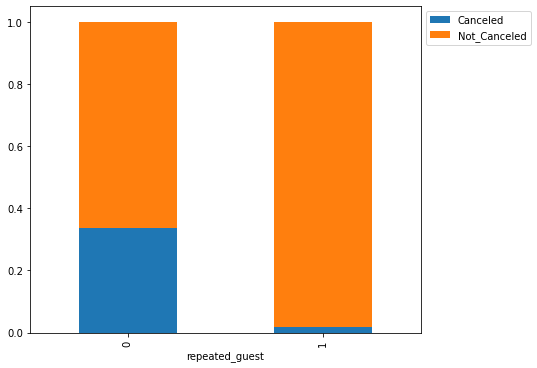

In [57]:
# This is the stacked barplot for repeated_guest with target as Booking status
stacked_barplot(Hotel_Data, 'repeated_guest', 'booking_status_desc')

#### Observations:
1. As observed in heatmap, the market_segment_type does not play a major factor in deciding the booking status.
2. None of the complementary bookings are cancelled, which is significant.

booking_status_desc           Canceled  Not_Canceled    All
no_of_previous_cancellations                               
All                              11885         24390  36275
0                                11869         24068  35937
1                                   11           187    198
13                                   4             0      4
3                                    1            42     43
2                                    0            46     46
4                                    0            10     10
5                                    0            11     11
6                                    0             1      1
11                                   0            25     25
------------------------------------------------------------------------------------------------------------------------


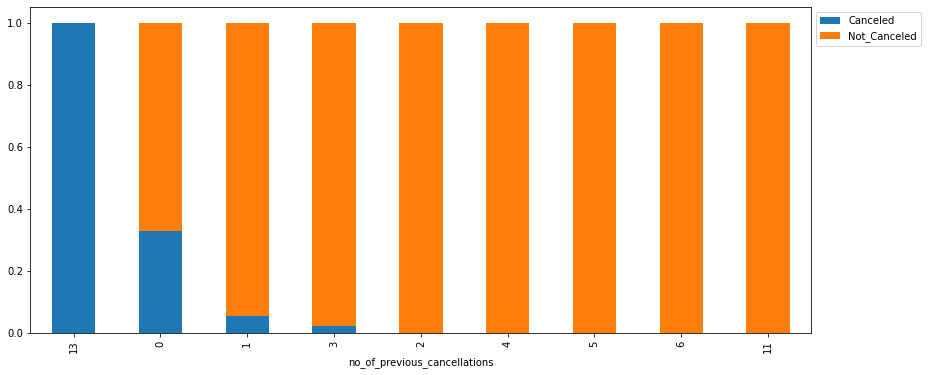

In [58]:
# This is the stacked barplot for no_of_previous_cancellations with target as Booking status
stacked_barplot(Hotel_Data, 'no_of_previous_cancellations', 'booking_status_desc')

#### Observations:
1. As observed in heatmap, the no_of_previous_cancellations does not play a major factor in deciding the booking status.
2. Most of the cancellations are concentrated for no_of_previous_cancellations = 0.

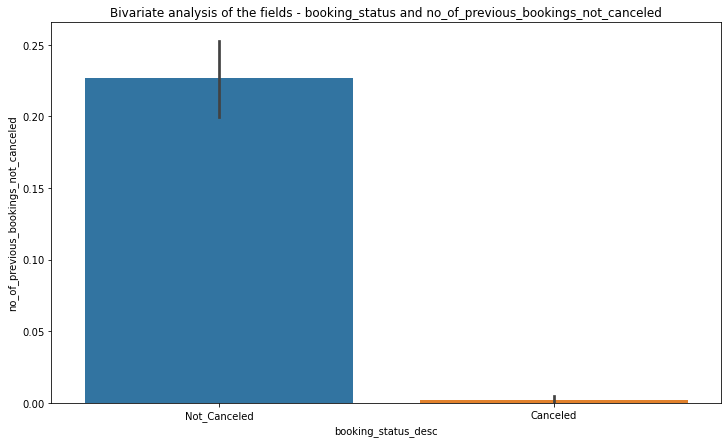

In [59]:
# Set the figure size and title for the plot
plt.figure(figsize=(12,7))
plt.title('Bivariate analysis of the fields - booking_status and no_of_previous_bookings_not_canceled')

# Line plot to compare used cell phone price vs screen size
sns.barplot(x="booking_status_desc",y="no_of_previous_bookings_not_canceled",data=Hotel_Data)
plt.show()

#### Observations:
1. As observed in heatmap, the no_of_previous_bookings_not_canceled does not play a major factor in deciding the booking status.
2. Most of the cancellations are concentrated for no_of_previous_bookings_not_canceled = 0.

booking_status_desc     Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


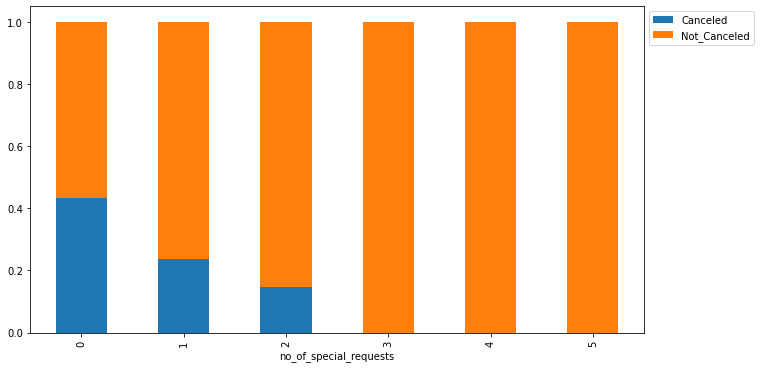

In [60]:
# This is the stacked barplot for no_of_special_requests with target as Booking status
stacked_barplot(Hotel_Data, 'no_of_special_requests', 'booking_status_desc')

#### Observations:
1. As observed in heatmap, the no_of_special_requests does play a major factor in deciding the booking status.
2. Bookings have less cancellation for no_of_special_requests 3, 5 and 5, but the there are only a few hunderds of observations for that condition.

#### Multivariate analysis

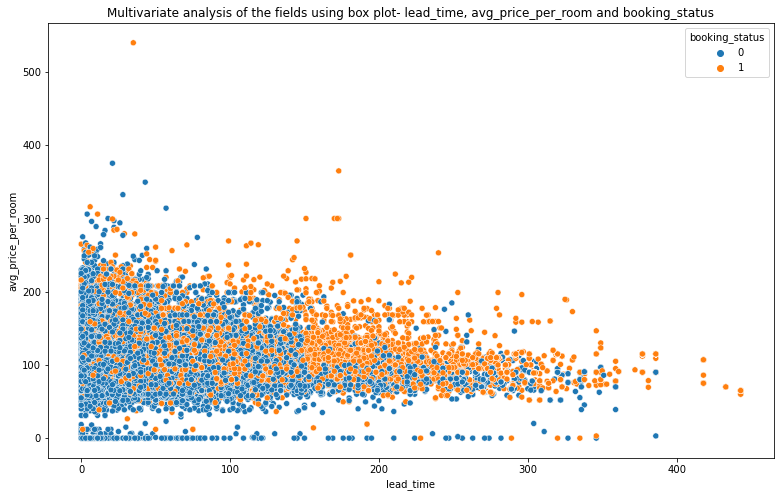

In [61]:
# Set the figure size and title for the plot
plt.figure(figsize=(13, 8))
plt.title('Multivariate analysis of the fields using box plot- lead_time, avg_price_per_room and booking_status')

# Scatter plot for analying the fields - used_price, days used and operating system (os)
sns.scatterplot(x="lead_time", y="avg_price_per_room",hue="booking_status",data=Hotel_Data)
plt.show()

#### Observations:
1. As we can see, the higher the lead time greater has the chance of getting cancelled (1 stands for cancellation). In other words, the bookings with least lead_time has less chance to getting cancelled.
2. There is no clear relationship between average price per room and booking status, but we can see that the lower the average price, there is less chance of getting cancelled.
3. Also notice that the average price is low when lead_time is high.

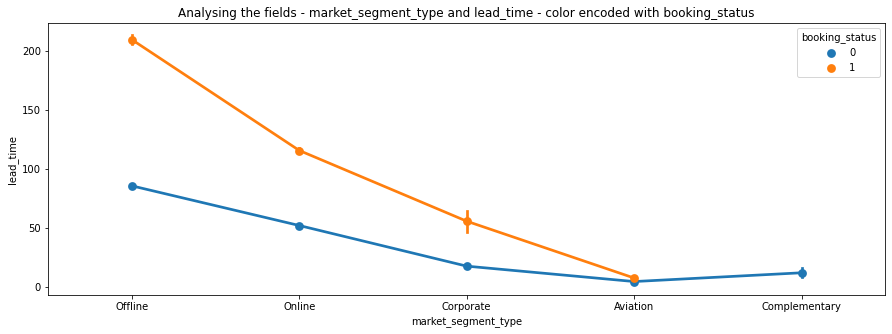

In [62]:
# Set the figure size and title for the plot
plt.figure(figsize=(15,5))
plt.title('Analysing the fields - market_segment_type and lead_time - color encoded with booking_status')

# Show the pointplot with a legend - used_price and os - color encoded with 4g status 
sns.pointplot(x="market_segment_type", y="lead_time", hue = 'booking_status',  data=Hotel_Data)
plt.show()

#### Observations:
1. As we can see, there are no cancellations for complementary bookings, but since that does not impact the revenue, it can be ignored.
2. The difference in average lead time between cancelled and not-cancelled bookings is high for offline market segment, meaning the offline bookings are done well in advance and is getting cancelled.
3. The difference in average lead time between cancelled and not-cancelled bookings is lower for online and corporate market segments, and is almost zero for aviation segment.

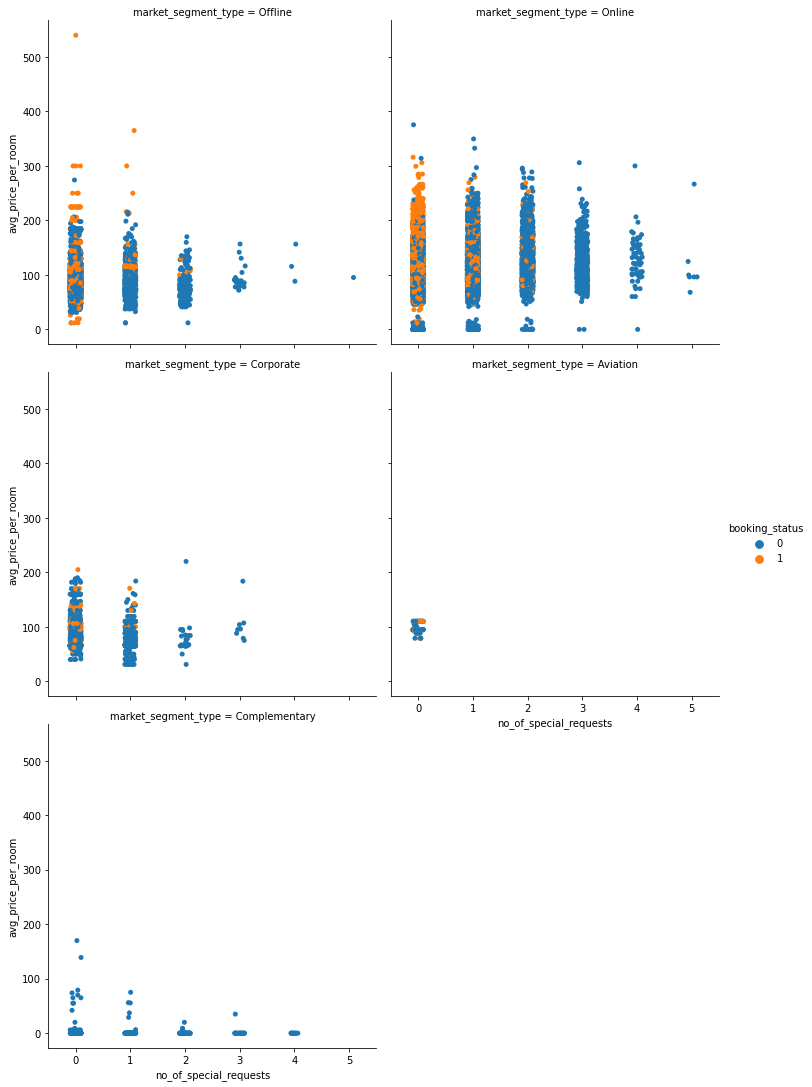

In [63]:
# Categorical Box plot with a legend - no_of_special_requests, avg_price_per_room, booking_status and market_segment_type.
sns.catplot(x="no_of_special_requests",
            y="avg_price_per_room",
            hue="booking_status",
            col="market_segment_type",
            data=Hotel_Data,
            kind="strip",
            col_wrap=2
           )
plt.show()

#### Observations:
1. As we have see earlier, Online market segment contributes more to the price than any segment. Also this segment has the highest number of special requests, ranging from 1 to 5.
2. Also we can notice that customers with more special requests have less cancellations.
3. There are no special requests from Aviation market segment and the cancellations are low.
4. There are fewer special requests for Corporate market segment and the cancellations are low.

## <a name='link2'>**3. Questions on Exploratory Data Analysis(EDA)**</a>
### Questions

#### 1. What are the busiest months in the hotel?

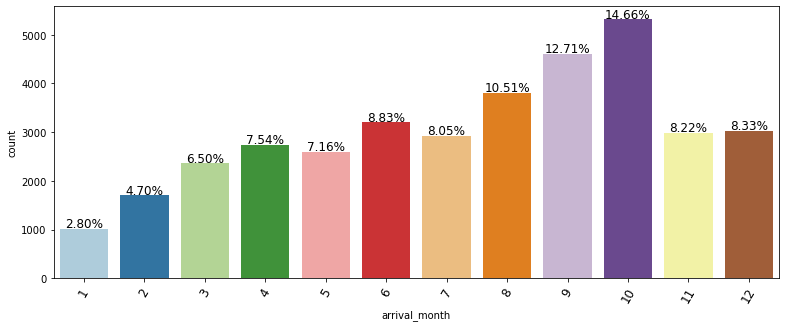

In [64]:
# Display a labeled_barplot for the categorical column 'arrival_month'
labeled_barplot(Hotel_Data, 'arrival_month', perc=True)

#### Answer: The busiest months are October (14.6%) and September (12.7%).

#### 2. Which market segment do most of the guests come from?

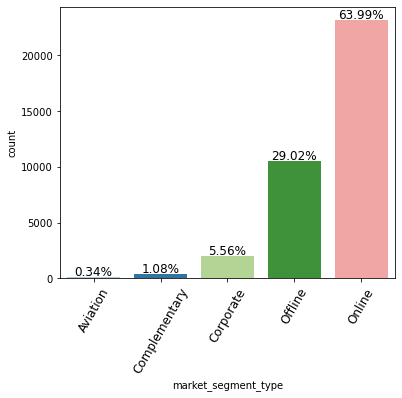

In [65]:
# Display a labeled_barplot for the categorical column 'market_segment_type'
labeled_barplot(Hotel_Data, 'market_segment_type', perc=True)

#### Observations: Most of the guests came from market segment 'Online' (63.9%)

#### 3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

In [66]:
# Create a dataframe with the mean of average price grouped by market_segment_type and sorted in descending order.
Hotel_Data_Price_by_Seg = Hotel_Data.groupby(by='market_segment_type')['avg_price_per_room'].mean().sort_values(
                                                                                            ascending=False).reset_index()
Hotel_Data_Price_by_Seg

market_segment_type  avg_price_per_room
0              Online          112.256855
1            Aviation          100.704000
2             Offline           91.632679
3           Corporate           82.911740
4       Complementary            3.141765

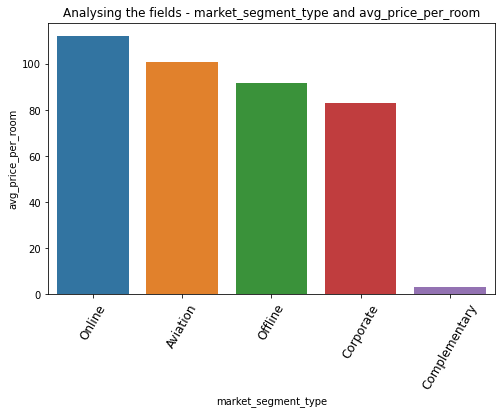

In [67]:
# Set the figure size and title for the plot
plt.figure(figsize=(8, 5))
plt.title('Analysing the fields - market_segment_type and avg_price_per_room')

# Show the bar plot - battery and brand_name
sns.barplot(data=Hotel_Data_Price_by_Seg, y="avg_price_per_room", x="market_segment_type")
plt.xticks(rotation=60,size=12)

plt.show()

#### Observations: The average price per room is higer for Online market segment (112 euros) followed by Aviation, Offline and Corporate. The Complementary market segment bookings have a very low price (3 euros), as most of them are free.

#### 4. What percentage of bookings are canceled?

In [68]:
# Get the total number of cancellations
No_of_cancellations = len(Hotel_Data[Hotel_Data['booking_status'] == 1])

# Get the total number of bookings
No_of_bookings = len(Hotel_Data['booking_status'])

# Get the percentage of bookings that are cancelled
print(np.round((No_of_cancellations/No_of_bookings)*100,2),'% of the bookings are cancelled')

32.76 % of the bookings are cancelled


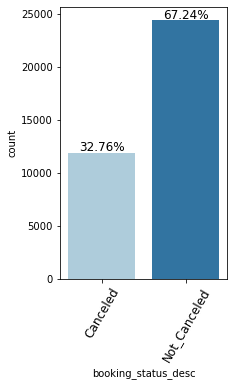

In [69]:
# Display a labeled_barplot for the categorical column 'booking_status'
labeled_barplot(Hotel_Data, 'booking_status_desc', perc=True)

#### Observations: 32.76 % of the all bookings are cancelled as per the data provided.

#### 5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

In [70]:
# Create a dataframe for repeated customers.
Hotel_Data_Rep_Guests = Hotel_Data[Hotel_Data['repeated_guest'] == 1]

In [71]:
# Get the total number of cancellations for repeated customers
No_of_cancellations = len(Hotel_Data_Rep_Guests[Hotel_Data_Rep_Guests['booking_status'] == 1])

# Get the total number of bookings for repeated customers
No_of_bookings = len(Hotel_Data_Rep_Guests['booking_status'])

# Get the percentage of bookings that are cancelled by repeated customers
print(np.round((No_of_cancellations/No_of_bookings)*100,2),'% of the bookings are cancelled for repeated customers.')

1.72 % of the bookings are cancelled for repeated customers.


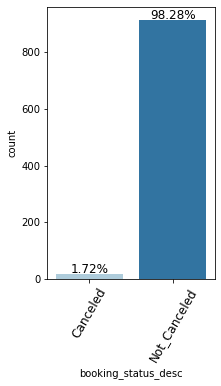

In [72]:
# Display a labeled_barplot for the categorical column 'booking_status'
labeled_barplot(Hotel_Data_Rep_Guests, 'booking_status_desc', perc=True)

#### Observations: Only 1.72 % of the bookings are cancelled by repeated customers.

#### 6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [73]:
# Create a dataframe for customers with special requirements.
Hotel_Data_Spl_Req = Hotel_Data[Hotel_Data['no_of_special_requests'] == 0]

In [74]:
# Get the total number of cancellations for customers with special requirements.
No_of_cancellations = len(Hotel_Data_Spl_Req[Hotel_Data_Spl_Req['booking_status'] == 1])

# Get the total number of bookings by customers with special requirements.
No_of_bookings = len(Hotel_Data_Spl_Req['booking_status'])

# Get the percentage of bookings that are cancelled by customers with special requirements.
print(np.round((No_of_cancellations/No_of_bookings)*100,2),'% of the bookings are cancelled by customers with special requirements.')

43.21 % of the bookings are cancelled by customers with special requirements.


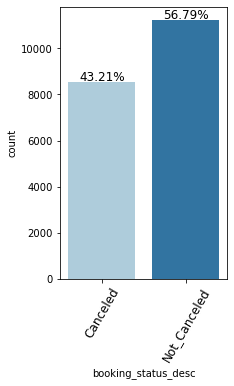

In [75]:
# Display a labeled_barplot for the categorical column 'booking_status'
labeled_barplot(Hotel_Data_Spl_Req, 'booking_status_desc', perc=True)

#### Observations: 43.21 % of the bookings are cancelled by customers with special requirements.

### Data Pre-processing

Let's encode the categorical columns - type_of_meal_plan, room_type_reserved and market_segment_type.
* For type_of_meal_plan and room_type_reserved, let's replace the column with numerical value that makes sense.
* For market_segment_type, perform onehot encoding on that column.

In [76]:
# Display the values in the column - type_of_meal_plan and room_type_reserved
print(Hotel_Data['type_of_meal_plan'].value_counts())
print(Hotel_Data['room_type_reserved'].value_counts())

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64


In [77]:
# Create a structure to encode the column values - type_of_meal_plan and room_type_reserved
ValueReplaceStruct = {
    "type_of_meal_plan":{"Not Selected":0,"Meal Plan 1":1,"Meal Plan 2":2,"Meal Plan 3":3},
    "room_type_reserved":{"Room_Type 1":0,"Room_Type 2":1,"Room_Type 3":2,"Room_Type 4":3,"Room_Type 5":4,"Room_Type 6":5,"Room_Type 7":6}
}

# Assign market_segment_type to the list oneHotCols
oneHotCols=["market_segment_type"]

# Display the replace struct
ValueReplaceStruct

{'type_of_meal_plan': {'Not Selected': 0,
  'Meal Plan 1': 1,
  'Meal Plan 2': 2,
  'Meal Plan 3': 3},
 'room_type_reserved': {'Room_Type 1': 0,
  'Room_Type 2': 1,
  'Room_Type 3': 2,
  'Room_Type 4': 3,
  'Room_Type 5': 4,
  'Room_Type 6': 5,
  'Room_Type 7': 6}}

In [78]:
# Encode the column values - type_of_meal_plan and room_type_reserved
Hotel_Data.replace(ValueReplaceStruct,inplace=True)

# OneHot encode column market_segment_type
Hotel_Data=pd.get_dummies(Hotel_Data, columns=oneHotCols, drop_first=True)

# Get a sample 10 rows of data using random state = 1 
Hotel_Data.sample(n=10, random_state=1)

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
30392             1               0                     1                  0   
6685              2               0                     1                  2   
8369              2               0                     2                  3   
2055              2               0                     0                  2   
10969             1               0                     2                  4   
24881             2               0                     3                  7   
28658             2               0                     0                  3   
20853             2               0                     1                  2   
8501              2               0                     0                  3   
1942              2               0                     0                  2   

       type_of_meal_plan  required_car_parking_space  room_type_reserved  \
30392                  0                           0                   0   
6685                   1                           0                   0   
8369                   1                           0                   3   
2055                   0                           0                   0   
10969                  1                           0                   0   
24881                  1                           0                   1   
28658                  2                           0                   0   
20853                  1                           0                   0   
8501                   1                           0                   1   
1942                   1                           0                   0   

       lead_time  arrival_year  arrival_month  arrival_date  repeated_guest  \
30392         53          2018              9            11               0   
6685          63          2018              4            22               0   
8369          55          2018              9            11               0   
2055          53          2017             12            29               0   
10969        245          2018              7             6               0   
24881        231          2018              8             1               0   
28658         71          2018              5            10               0   
20853         66          2017             10             9               0   
8501          40          2018              1            14               0   
1942          63          2018              8             9               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
30392                             0                                     0   
6685                              0                                     0   
8369                              0                                     0   
2055                              0                                     0   
10969                             0                                     0   
24881                             0                                     0   
28658                             0                                     0   
20853                             0                                     0   
8501                              0                                     0   
1942                              0                                     0   

       avg_price_per_room  no_of_special_requests booking_status_desc  \
30392               94.32                       0        Not_Canceled   
6685               105.30                       1            Canceled   
8369               106.24                       0        Not_Canceled   
2055                81.00                       1        Not_Canceled   
10969              110.00                       0            Canceled   
24881               81.82                       2            Canceled   
28658              126.00                       1        Not

In [79]:
# Display the values in the column - type_of_meal_plan and room_type_reserved
print(Hotel_Data['type_of_meal_plan'].value_counts())
print(Hotel_Data['room_type_reserved'].value_counts())

1    27835
0     5130
2     3305
3        5
Name: type_of_meal_plan, dtype: int64
0    28130
3     6057
5      966
1      692
4      265
6      158
2        7
Name: room_type_reserved, dtype: int64


In [80]:
# Drop the temporary column booking_status_desc as it is no longer needed in further analysis.
Hotel_Data.drop('booking_status_desc',axis=1,inplace=True)

In [81]:
# use info() method to print a concise summary of the pandas DataFrame
Hotel_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  int64  
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  repeated_guest 

Note that all the columns have now became **numeric** for Model prediction.

#### Outlier Treatment
For now, I have decided not to do outlier treatment as the models are capable of handling outliers.

### Splitting up Data for Model Prediction

In [82]:
# defining X and y variables
X = Hotel_Data.drop(['booking_status'],axis=1)
y = Hotel_Data['booking_status']

In [83]:
# Get a copy of X and y varaibles for use in Decision Tree model
X_copy = X.copy()
y_copy = y.copy()

In [84]:
# Library to split data
from sklearn.model_selection import train_test_split

# splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 25392
Number of rows in test data = 10883


In [85]:
print("Original Cancelled Bookings       : {0} ({1:0.2f}%)".format(len(Hotel_Data.loc[Hotel_Data['booking_status'] == 1]), (len(Hotel_Data.loc[Hotel_Data['booking_status'] == 1])/len(Hotel_Data.index)) * 100))
print("Original Non-Cancelled Bookings   : {0} ({1:0.2f}%)".format(len(Hotel_Data.loc[Hotel_Data['booking_status'] == 0]), (len(Hotel_Data.loc[Hotel_Data['booking_status'] == 0])/len(Hotel_Data.index)) * 100))
print("")
print("Training Cancelled Bookings       : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Non-Cancelled Bookings   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Cancelled Bookings           : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Non-Cancelled Bookings       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))

Original Cancelled Bookings       : 11885 (32.76%)
Original Non-Cancelled Bookings   : 24390 (67.24%)

Training Cancelled Bookings       : 8363 (32.94%)
Training Non-Cancelled Bookings   : 17029 (67.06%)

Test Cancelled Bookings           : 3522 (32.36%)
Test Non-Cancelled Bookings       : 7361 (67.64%)


There are 32.76% of cancelled bookings in original dataset. This ratio is consistent with Training and testing dataset.

### Functions for calculating Model Performance

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels and model_performance_classification_sklearnmodels functions will be used to check the model performance of models.
* The confusion_matrix_statsmodels and confusion_matrix_sklearn functions will be used to plot confusion matrix

In [86]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("Actual label")
    plt.xlabel("Predicted label")

In [87]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_sklearnmodels(
    model, predictors, target
):
    """
    Function to compute different metrics to check classification sklearn model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # prediction for sklearn model
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [88]:
# defining a function to plot the confusion_matrix of a classification model
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("Actual label")
    plt.xlabel("Predicted label")

In [89]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

## <a name='link3'>**4. Building Logistic Regression models**</a>

#### Logistic Regression model (with sklearn)
Build a Logistic Regression model (with sklearn) with the training data and then check it's performance.

In [90]:
# To build model for prediction
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

In [91]:
# building a Logistic Regression model.
hotel_booking_sklearn_log_reg_model = LogisticRegression(solver='newton-cg',random_state=1)
hotel_booking_sklearn_log_reg_model.fit(X_train,y_train)

LogisticRegression(random_state=1, solver='newton-cg')

#### Checking model performance on the training set

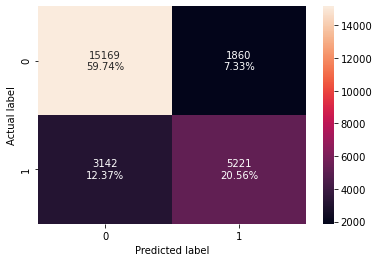

In [92]:
# creating confusion matrix
confusion_matrix_sklearn(hotel_booking_sklearn_log_reg_model,X_train,y_train)

In [93]:
# checking model performance for this model
hotel_booking_sklearn_log_reg_model_train_perf_df = model_performance_classification_sklearnmodels(
                                                    hotel_booking_sklearn_log_reg_model,X_train,y_train)
print("Training performance:")
hotel_booking_sklearn_log_reg_model_train_perf_df

Training performance:


Accuracy    Recall  Precision       F1
0  0.803009  0.624298   0.737325  0.67612

#### Checking model performance on the testing set

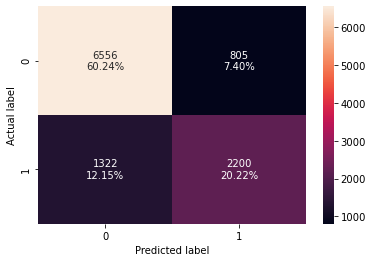

In [94]:
# creating confusion matrix
confusion_matrix_sklearn(hotel_booking_sklearn_log_reg_model,X_test,y_test)

In [95]:
# checking model performance for this model
hotel_booking_sklearn_log_reg_model_test_perf_df = model_performance_classification_sklearnmodels(
                                                    hotel_booking_sklearn_log_reg_model,X_test,y_test)
print("Testing performance:")
hotel_booking_sklearn_log_reg_model_test_perf_df

Testing performance:


Accuracy    Recall  Precision        F1
0  0.804558  0.624645   0.732113  0.674123

#### Observations:
1. The training and testing accuracy is about 80%, but the recall are 62.4%. 2. Recall on the train and test sets are comparable.
3. This shows that the model is giving a generalised result. Let's keep trying to get a higher recall.

#### Logistic Regression model (with statsmodels)
Build a Logistic Regression model (with statsmodels) with the training data and then check it's performance.

In [96]:
# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

from statsmodels.tools.sm_exceptions import ConvergenceWarning
wns.simplefilter('ignore', ConvergenceWarning)

In [97]:
# adding constant
X = sm.add_constant(X)

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [98]:
# building a Logistic Regression model.
hotel_booking_statsmodels_log_reg_model = sm.Logit(y_train,X_train)
hotel_booking_statsmodels_log_reg_model = hotel_booking_statsmodels_log_reg_model.fit(disp=False)
# setting disp=False will remove the information on number of iterations

print(hotel_booking_statsmodels_log_reg_model.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25371
Method:                           MLE   Df Model:                           20
Date:                Sat, 20 Nov 2021   Pseudo R-squ.:                  0.3279
Time:                        00:18:40   Log-Likelihood:                -10816.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -892.7731    118.847     -7.512      0.000   -1125.708    -659.838
no_of_adults                             0.1368      

#### Observations:
* Negative values of the coefficient (example:market_segment_type_Complementary,repeated_guest etc.) shows that probability of customer cancelling the booking decreases with the increase of corresponding attribute value.
* Positive values of the coefficient (example:lead_time, no_of_previous_cancellations etc.) show that that probability of customer cancelling the booking increases with the increase of corresponding attribute value.
* p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

#### Multicollinearity
But these variables might contain multicollinearity, which will affect the p-values. We will have to remove multicollinearity from the data to get reliable coefficients and p-values.

There are different ways of detecting (or testing) multi-collinearity, one such way is the **Variation Inflation Factor**.

Variance inflation factors measure the inflation in the variances of the regression coefficients estimates due to collinearity that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient βk is "inflated" by the existence of correlation among the predictor variables in the model.

General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and hence the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity. But the purpose of the analysis should dictate which threshold to use.

In [99]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [100]:
# checking VIF for X_train data
checking_vif(X_train)

feature           VIF
0                                  const  3.890841e+07
1                           no_of_adults  1.330714e+00
2                         no_of_children  1.267522e+00
3                   no_of_weekend_nights  1.068126e+00
4                      no_of_week_nights  1.086490e+00
5                      type_of_meal_plan  1.409505e+00
6             required_car_parking_space  1.038847e+00
7                     room_type_reserved  1.556293e+00
8                              lead_time  1.376522e+00
9                           arrival_year  1.410202e+00
10                         arrival_month  1.273765e+00
11                          arrival_date  1.005885e+00
12                        repeated_guest  1.781553e+00
13          no_of_previous_cancellations  1.394915e+00
14  no_of_previous_bookings_not_canceled  1.651273e+00
15                    avg_price_per_room  1.956711e+00
16                no_of_special_requests  1.242152e+00
17     market_segment_type_Complementary  4.436203e+00
18         market_segment_type_Corporate  1.686666e+01
19           market_segment_type_Offline  6.395603e+01
20            market_segment_type_Online  7.107792e+01

The variable **market_segment_type_Online** exhibit high multicollinearity, Lets drop it from the dataset. 

In [101]:
# treating market_segment_type_Online for Multicollinearity
col_to_drop = "market_segment_type_Online"
X_train = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
checking_vif(X_train)

feature           VIF
0                                  const  3.882071e+07
1                           no_of_adults  1.315329e+00
2                         no_of_children  1.265005e+00
3                   no_of_weekend_nights  1.067674e+00
4                      no_of_week_nights  1.085828e+00
5                      type_of_meal_plan  1.406939e+00
6             required_car_parking_space  1.038717e+00
7                     room_type_reserved  1.550773e+00
8                              lead_time  1.371706e+00
9                           arrival_year  1.407378e+00
10                         arrival_month  1.272646e+00
11                          arrival_date  1.005871e+00
12                        repeated_guest  1.778199e+00
13          no_of_previous_cancellations  1.394672e+00
14  no_of_previous_bookings_not_canceled  1.651016e+00
15                    avg_price_per_room  1.955671e+00
16                no_of_special_requests  1.237534e+00
17     market_segment_type_Complementary  1.292321e+00
18         market_segment_type_Corporate  1.490731e+00
19           market_segment_type_Offline  1.561369e+00

#### Let's remove the insignificant features (p-value>0.05).

We will do the following repeatedly using a loop:
* Build a model, check the p-values of the variables, and drop the column with the highest p-value.
* Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
* Repeat the above two steps till there are no columns with p-value > 0.05.

In [102]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'market_segment_type_Corporate', 'market_segment_type_Offline']


The above columns are the **significant columns**. Lets create X_train2 and X_test2 with the significant columns.

In [103]:
# creating a new training and testing set
X_train2 = X_train[selected_features]
X_test2 = X_test[selected_features]

In [104]:
# building a Logistic Regression model.
hotel_booking_statsmodels_log_reg_model2 = sm.Logit(y_train,X_train2)
hotel_booking_statsmodels_log_reg_model2 = hotel_booking_statsmodels_log_reg_model2.fit(disp=False)

print(hotel_booking_statsmodels_log_reg_model2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25376
Method:                           MLE   Df Model:                           15
Date:                Sat, 20 Nov 2021   Pseudo R-squ.:                  0.3269
Time:                        00:18:43   Log-Likelihood:                -10831.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          -888.5452    118.434     -7.502      0.000   -1120.672    -656.418
no_of_adults                      0.1274      0.036      3.534      0.000 

Now no feature has p-value greater than 0.05, so we'll consider the features in **X_train2** as the significant features and **hotel_booking_statsmodels_log_reg_model2** as the final model.

#### Coefficient interpretations:
* Coefficient of features - *no_of_adults, no_of_weekend_nights, no_of_week_nights, lead_time, arrival_year,  no_of_previous_cancellations and avg_price_per_room* are positive; an increase in these will lead to an increase in chances of a customer cancel the booking.
* Coefficients of features - *type_of_meal_plan, required_car_parking_space, room_type_reserved, arrival_month, repeated_guest, no_of_special_requests, market_segment_type_Corporate and market_segment_type_Offline* are negative; an increase in these will lead to a decrease in chances of a customer cancelling the booking.

#### Converting coefficients to odds:
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
* Therefore, odds = exp(b)
* The percentage change in odds is given as odds = (exp(b) - 1) * 100

In [105]:
# converting coefficients to odds
odds = np.exp(hotel_booking_statsmodels_log_reg_model2.params)

# finding the percentage change
perc_change_odds = (np.exp(hotel_booking_statsmodels_log_reg_model2.params) - 1) * 100

# adding the odds to a dataframe
odds_df = pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns)
odds_df.sort_values(by='Odds')

Odds  Change_odd%
const                          0.000000  -100.000000
repeated_guest                 0.064140   -93.585982
market_segment_type_Offline    0.165882   -83.411778
required_car_parking_space     0.200433   -79.956702
no_of_special_requests         0.231016   -76.898385
market_segment_type_Corporate  0.421320   -57.867979
room_type_reserved             0.869007   -13.099329
type_of_meal_plan              0.911795    -8.820520
arrival_month                  0.958418    -4.158230
lead_time                      1.015827     1.582694
avg_price_per_room             1.019574     1.957444
no_of_week_nights              1.038642     3.864226
no_of_weekend_nights           1.111955    11.195536
no_of_adults                   1.135891    13.589146
no_of_previous_cancellations   1.253798    25.379813
arrival_year                   1.551085    55.108487

#### Coefficient interpretations:
* lead_time: Holding all other features constant a unit change in lead_time will increase the odds of a customer being a cancelling the booking by 1.015 times or a 1.58% increase in odds.
* avg_price_per_room: Holding all other features constant a unit change in avg_price_per_room will increase the odds of a customer cancelling the booking by 1.02 times or a 1.95% increase in the odds.
* no_of_special_requests: Holding all other features constant a unit change in no_of_special_requests will decrease the odds of a customer cancelling the booking by 0.23 times or a 76.89% decrease in the odds.
* market_segment_type: The odds of an Offline market segment customer cancelling the booking is 0.17 times less than other market segments or 83.41% fewer odds than other segment customers. [keeping market_segment_type_Offline category as a reference]

Interpretation for other attributes can be done similarly.

#### Checking model performance on the training set

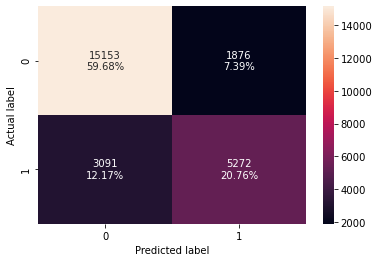

In [106]:
# creating confusion matrix
confusion_matrix_statsmodels(hotel_booking_statsmodels_log_reg_model2,X_train2,y_train)

In [107]:
# checking model performance for this model
hotel_booking_statsmodels_log_reg_model_train_perf_df = model_performance_classification_statsmodels(
    hotel_booking_statsmodels_log_reg_model2,X_train2,y_train
)

print("Training performance:")
hotel_booking_statsmodels_log_reg_model_train_perf_df

Training performance:


Accuracy    Recall  Precision        F1
0  0.804387  0.630396   0.737549  0.679776

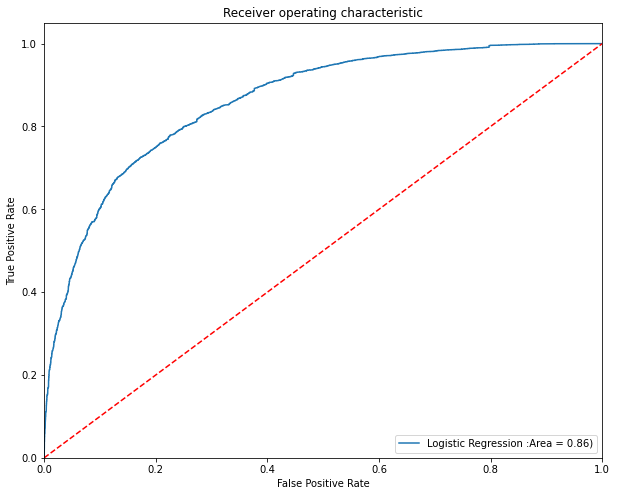

In [108]:
# ROC-AUC on training set
hotel_booking_statsmodels_log_reg_roc_auc_score = roc_auc_score(y_train,hotel_booking_statsmodels_log_reg_model2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train,hotel_booking_statsmodels_log_reg_model2.predict(X_train2))

plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,label="Logistic Regression :Area = %0.2f)" % hotel_booking_statsmodels_log_reg_roc_auc_score)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Optimal threshold using AUC-ROC curve
* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

In [109]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low

hotel_booking_statsmodels_optimal_idx = np.argmax(tpr - fpr) # find the point where the difference in tpr and fpr is maximum
print('optimal_idx:',hotel_booking_statsmodels_optimal_idx)
hotel_booking_statsmodels_optimal_threshold_auc_roc  = thresholds[hotel_booking_statsmodels_optimal_idx]
print('optimal_threshold_auc_roc:',hotel_booking_statsmodels_optimal_threshold_auc_roc)

optimal_idx: 3907
optimal_threshold_auc_roc: 0.31697368508365786


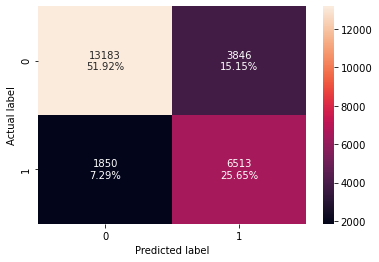

In [110]:
# re-creating confusion matrix with hotel_booking_statsmodels_optimal_threshold_auc_roc
confusion_matrix_statsmodels(hotel_booking_statsmodels_log_reg_model2
                             ,X_train2
                             ,y_train
                             ,threshold=hotel_booking_statsmodels_optimal_threshold_auc_roc)

In [111]:
# re-checking model performance for this model with hotel_booking_statsmodels_optimal_threshold_auc_roc
hotel_booking_statsmodels_log_reg_model_auc_roc_thld_train_df = model_performance_classification_statsmodels(
    hotel_booking_statsmodels_log_reg_model2,
    X_train2,
    y_train,
    threshold=hotel_booking_statsmodels_optimal_threshold_auc_roc
)
print("Training performance:")
hotel_booking_statsmodels_log_reg_model_auc_roc_thld_train_df

Training performance:


Accuracy    Recall  Precision        F1
0  0.775677  0.778788   0.628729  0.695759

* Model performance has improved significantly.
* Model is giving a recall of 0.78 as compared to initial model which was giving a recall of 0.63.
* Precision has decreased from 0.73 to 0.62.

#### Let's use Precision-Recall curve and see if we can find a better threshold

In [112]:
y_pred_train2 = hotel_booking_statsmodels_log_reg_model2.predict(X_train2)
precision_array, recall_array, threshold_array = precision_recall_curve(y_train,y_pred_train2)

In [113]:
def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

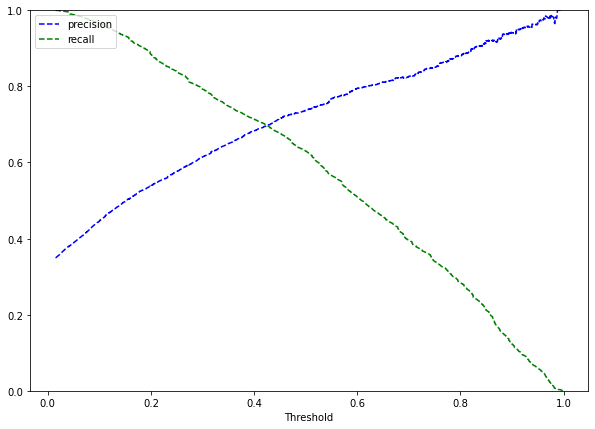

In [114]:
plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(precision_array, recall_array, threshold_array)
plt.show()

In [115]:
# setting the threshold
hotel_booking_statsmodels_optimal_pre_rcl_thld_curve = 0.416

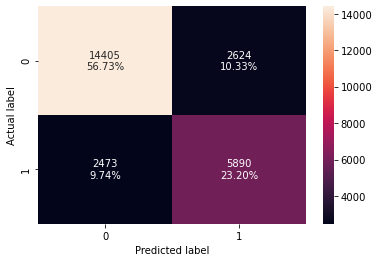

In [116]:
# re-creating confusion matrix with hotel_booking_statsmodels_optimal_pre_rcl_thld_curve
confusion_matrix_statsmodels(hotel_booking_statsmodels_log_reg_model2
                             ,X_train2
                             ,y_train
                             ,threshold=hotel_booking_statsmodels_optimal_pre_rcl_thld_curve)

In [117]:
# re-checking model performance for this model with hotel_booking_statsmodels_optimal_pre_rcl_thld_curve
hotel_booking_statsmodels_log_reg_model_pre_rcl_thld_train_df = model_performance_classification_statsmodels(
    hotel_booking_statsmodels_log_reg_model2,
    X_train2,
    y_train,
    threshold=hotel_booking_statsmodels_optimal_pre_rcl_thld_curve
)
print("Training performance:")
hotel_booking_statsmodels_log_reg_model_pre_rcl_thld_train_df

Training performance:


Accuracy    Recall  Precision        F1
0  0.799267  0.704293   0.691802  0.697991

* Recall has improved as compared to the initial models.
* Model is giving a better performance with 0.317 threshold found using AUC-ROC curve with improved precision of 0.69.

#### Checking model performance on the testing set

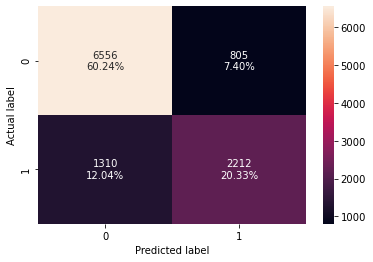

In [118]:
# creating confusion matrix
confusion_matrix_statsmodels(hotel_booking_statsmodels_log_reg_model2,X_test2,y_test)

In [119]:
# checking model performance for this model
hotel_booking_statsmodels_log_reg_model_test_perf_df = model_performance_classification_statsmodels(
    hotel_booking_statsmodels_log_reg_model2,X_test2,y_test
)

print("Testing performance:")
hotel_booking_statsmodels_log_reg_model_test_perf_df

Testing performance:


Accuracy    Recall  Precision        F1
0   0.80566  0.628052   0.733179  0.676556

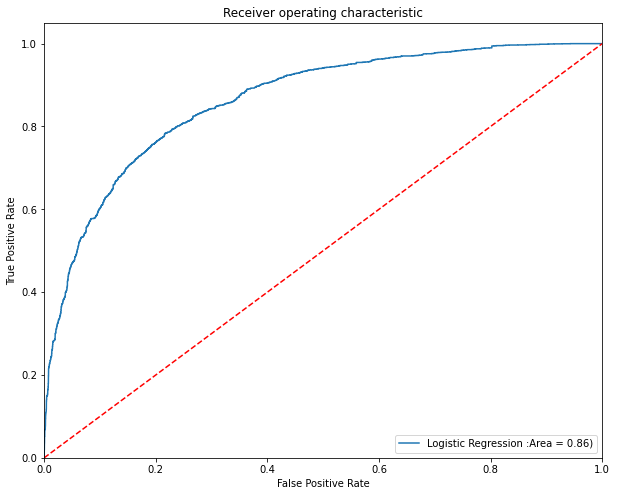

In [120]:
hotel_booking_statsmodels_log_reg_roc_auc_score = roc_auc_score(y_test,hotel_booking_statsmodels_log_reg_model2.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test,hotel_booking_statsmodels_log_reg_model2.predict(X_test2))

plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,label="Logistic Regression :Area = %0.2f)" % hotel_booking_statsmodels_log_reg_roc_auc_score)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Using model with threshold = 0.317

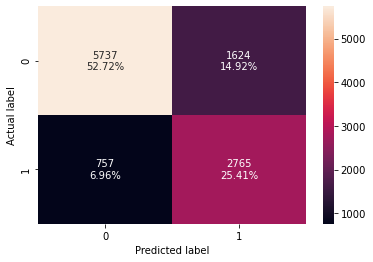

In [121]:
# re-creating confusion matrix with hotel_booking_statsmodels_optimal_threshold_auc_roc
confusion_matrix_statsmodels(hotel_booking_statsmodels_log_reg_model2
                             ,X_test2
                             ,y_test
                             ,threshold=hotel_booking_statsmodels_optimal_threshold_auc_roc)

In [122]:
# re-checking model performance for this model with hotel_booking_statsmodels_optimal_threshold_auc_roc
hotel_booking_statsmodels_log_reg_model_auc_roc_thld_test_df = model_performance_classification_statsmodels(
    hotel_booking_statsmodels_log_reg_model2,
    X_test2,
    y_test,
    threshold=hotel_booking_statsmodels_optimal_threshold_auc_roc
)
print("testing performance:")
hotel_booking_statsmodels_log_reg_model_auc_roc_thld_test_df

testing performance:


Accuracy    Recall  Precision        F1
0  0.781218  0.785065   0.629984  0.699027

#### Using model with threshold = 0.416

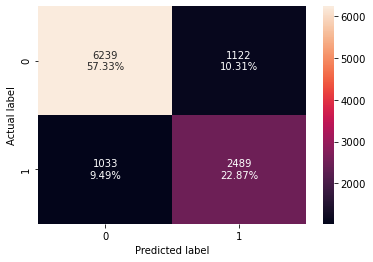

In [123]:
# re-creating confusion matrix with hotel_booking_statsmodels_optimal_pre_rcl_thld_curve
confusion_matrix_statsmodels(hotel_booking_statsmodels_log_reg_model2
                             ,X_test2
                             ,y_test
                             ,threshold=hotel_booking_statsmodels_optimal_pre_rcl_thld_curve)

In [124]:
# re-checking model performance for this model with optimal_threshold_auc_roc
hotel_booking_statsmodels_log_reg_model_pre_rcl_thld_test_df = model_performance_classification_statsmodels(
    hotel_booking_statsmodels_log_reg_model2,
    X_test2,
    y_test,
    threshold=hotel_booking_statsmodels_optimal_pre_rcl_thld_curve
)
print("Testing performance:")
hotel_booking_statsmodels_log_reg_model_pre_rcl_thld_test_df

Testing performance:


Accuracy    Recall  Precision        F1
0  0.801985  0.706701   0.689283  0.697883

## <a name='link4'>**5. Logistic Regression - Model Performance Summary - Train and Test**</a>

#### Model Performance Summary - Training set

In [125]:
# training performance comparison
hotel_booking_log_reg_models_train_compare_df = pd.concat(
    [
        hotel_booking_sklearn_log_reg_model_train_perf_df.T,
        hotel_booking_statsmodels_log_reg_model_train_perf_df.T,
        hotel_booking_statsmodels_log_reg_model_auc_roc_thld_train_df.T,
        hotel_booking_statsmodels_log_reg_model_pre_rcl_thld_train_df.T,
    ],axis=1
)
hotel_booking_log_reg_models_train_compare_df.columns=[
    "Logistic Regression sklearn",
    "Logistic Regression statsmodels",
    "Logistic Regression 0.317 Threshold",
    "Logistic Regression 0.416 Threshold"
]
print("training performance comparison:")
hotel_booking_log_reg_models_train_compare_df

training performance comparison:


Logistic Regression sklearn  Logistic Regression statsmodels  \
Accuracy                      0.803009                         0.804387   
Recall                        0.624298                         0.630396   
Precision                     0.737325                         0.737549   
F1                            0.676120                         0.679776   

           Logistic Regression 0.317 Threshold  \
Accuracy                              0.775677   
Recall                                0.778788   
Precision                             0.628729   
F1                                    0.695759   

           Logistic Regression 0.416 Threshold  
Accuracy                              0.799267  
Recall                                0.704293  
Precision                             0.691802  
F1                                    0.697991

#### Model Performance Summary - Testing set

In [126]:
# testing performance comparison
hotel_booking_log_reg_models_test_compare_df = pd.concat(
    [
        hotel_booking_sklearn_log_reg_model_test_perf_df.T,
        hotel_booking_statsmodels_log_reg_model_test_perf_df.T,
        hotel_booking_statsmodels_log_reg_model_auc_roc_thld_test_df.T,
        hotel_booking_statsmodels_log_reg_model_pre_rcl_thld_test_df.T,
    ],axis=1
)
hotel_booking_log_reg_models_test_compare_df.columns=[
    "Logistic Regression sklearn",
    "Logistic Regression statsmodels",
    "Logistic Regression 0.317 Threshold",
    "Logistic Regression 0.416 Threshold"
]
print("Testing performance comparison:")
hotel_booking_log_reg_models_test_compare_df

Testing performance comparison:


Logistic Regression sklearn  Logistic Regression statsmodels  \
Accuracy                      0.804558                         0.805660   
Recall                        0.624645                         0.628052   
Precision                     0.732113                         0.733179   
F1                            0.674123                         0.676556   

           Logistic Regression 0.317 Threshold  \
Accuracy                              0.781218   
Recall                                0.785065   
Precision                             0.629984   
F1                                    0.699027   

           Logistic Regression 0.416 Threshold  
Accuracy                              0.801985  
Recall                                0.706701  
Precision                             0.689283  
F1                                    0.697883

### Conclusion
1. All the models are giving a generalized performance on training and test set.
2. The highest recall is 78.5% on the testing set with 0.317 threshold.
3. Using the model with sklearn and statsmodels (default threshold) will give a low recall but good precision scores - This model will help the hotel save resources but will incorrectly predict potential non-cancelling customers.
4. Using the model with 0.317 threshold the model will give a high recall but low precision scores - This model will help the hotel identify non-cancelling customers effectively but the cost of resources will be high.
5. Using the model with 0.416 threshold the model will give a balance recall and precision score - This model will help the hotel to maintain a balance in identifying potential non-cancelling customers and the cost of resources.

## <a name='link5'>**6. Building Decision Tree models**</a>

### Decision Tree model (with sklearn)
Build a Decision Tree model (with sklearn) with the training data and then check it's performance.

In [127]:
# Get X and y varaibles from the copy for use in Decision Tree model
X = X_copy.copy()
y = y_copy.copy()

In [128]:
# Library to split data
from sklearn.model_selection import train_test_split

# splitting data for training and testing
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [129]:
# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [130]:
# Building the decision tress model using sklearn
Hotel_Booking_Sklearn_Tree_Model = DecisionTreeClassifier(criterion='gini',random_state=1)
Hotel_Booking_Sklearn_Tree_Model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

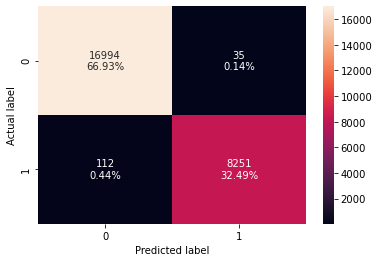

In [131]:
# creating confusion matrix
confusion_matrix_sklearn(Hotel_Booking_Sklearn_Tree_Model,X_train,y_train)

In [132]:
# checking model performance for this model
Hotel_Booking_Sklearn_Tree_Model_Train_df = model_performance_classification_sklearnmodels(Hotel_Booking_Sklearn_Tree_Model
                                                                                    ,X_train
                                                                                    ,y_train
                                                                                   )
Hotel_Booking_Sklearn_Tree_Model_Train_df

Accuracy    Recall  Precision        F1
0  0.994211  0.986608   0.995776  0.991171

#### Checking model performance on test set

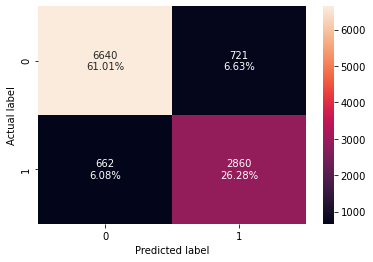

In [133]:
# creating confusion matrix
confusion_matrix_sklearn(Hotel_Booking_Sklearn_Tree_Model,X_test,y_test)

In [134]:
# checking model performance for this model
Hotel_Booking_Sklearn_Tree_Model_Test_df = model_performance_classification_sklearnmodels(Hotel_Booking_Sklearn_Tree_Model
                                                                                   ,X_test
                                                                                   ,y_test
                                                                                  )
Hotel_Booking_Sklearn_Tree_Model_Test_df

Accuracy    Recall  Precision        F1
0  0.872921  0.812039    0.79866  0.805294

Model is giving good and generalized results on training and test set.

#### Visualizing the Decision Tree (sklearn decision tree)

In [135]:
# Get the list of features of the Hotel booking dataset for plotting the descision tree.
feature_names = X.columns.to_list()
feature_names

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'type_of_meal_plan',
 'required_car_parking_space',
 'room_type_reserved',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests',
 'market_segment_type_Complementary',
 'market_segment_type_Corporate',
 'market_segment_type_Offline',
 'market_segment_type_Online']

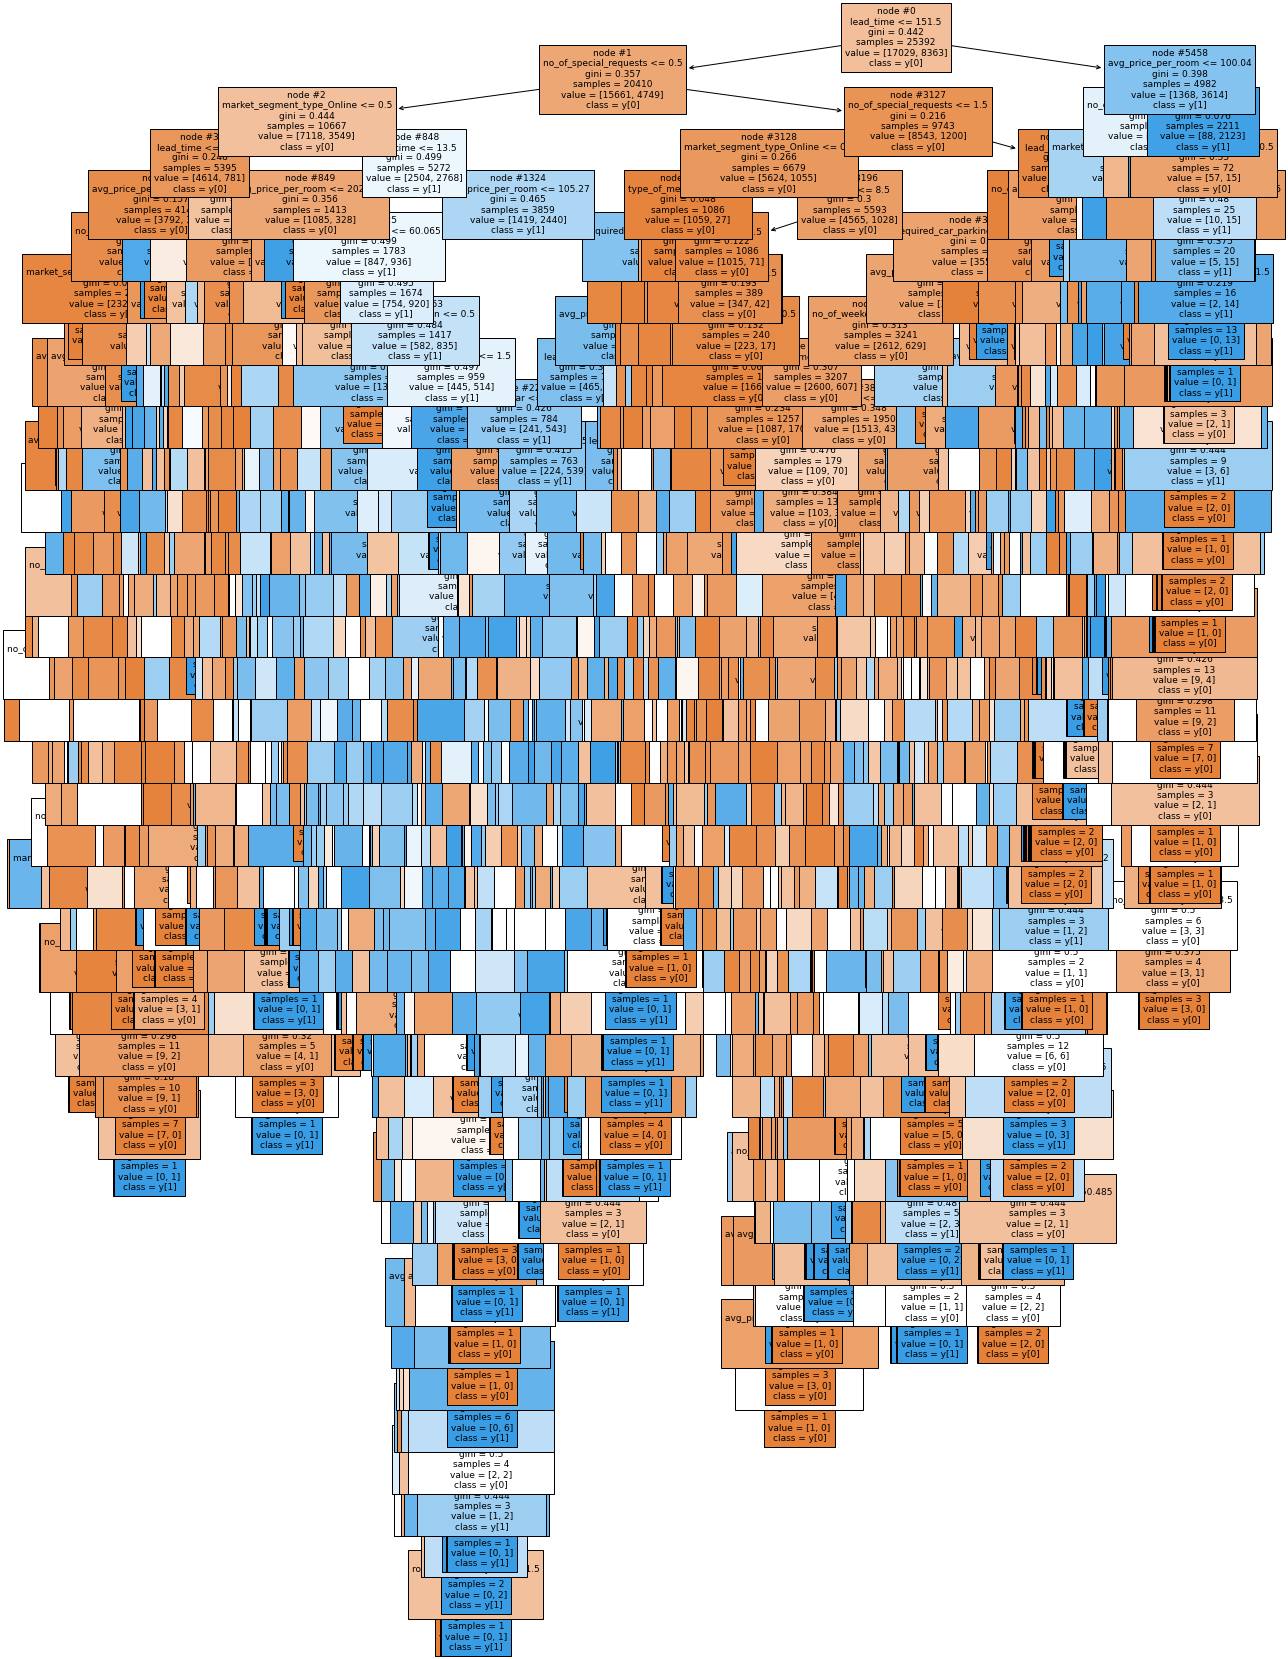

In [136]:
# Plotting the descision tree.
plt.figure(figsize=(20,30))
tree.plot_tree(Hotel_Booking_Sklearn_Tree_Model
               ,feature_names=feature_names
               ,filled=True
               ,fontsize=9
               ,node_ids=True
               ,class_names=True
              )
plt.show()

In [137]:
# Text report showing the rules of a decision tree
print(tree.export_text(Hotel_Booking_Sklearn_Tree_Model
                       ,feature_names=feature_names
                       ,show_weights=True
                      )
     )

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 48.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [63.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  48.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [109.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room

In [138]:
# importance of features in the tree building ( The importance of a feature is computed as the 
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance)
pd.DataFrame(Hotel_Booking_Sklearn_Tree_Model.feature_importances_
             ,columns=['Importance']
             ,index=X.columns
            ).sort_values(by='Importance'
                          ,ascending=False
                         )

Importance
lead_time                               0.351635
avg_price_per_room                      0.175306
market_segment_type_Online              0.093856
arrival_date                            0.086450
no_of_special_requests                  0.068312
arrival_month                           0.065027
no_of_week_nights                       0.042702
no_of_weekend_nights                    0.039870
no_of_adults                            0.026411
room_type_reserved                      0.011990
type_of_meal_plan                       0.011589
arrival_year                            0.011514
required_car_parking_space              0.007278
no_of_children                          0.003881
market_segment_type_Offline             0.002338
no_of_previous_bookings_not_canceled    0.000704
market_segment_type_Corporate           0.000619
repeated_guest                          0.000307
no_of_previous_cancellations            0.000121
market_segment_type_Complementary       0.000091

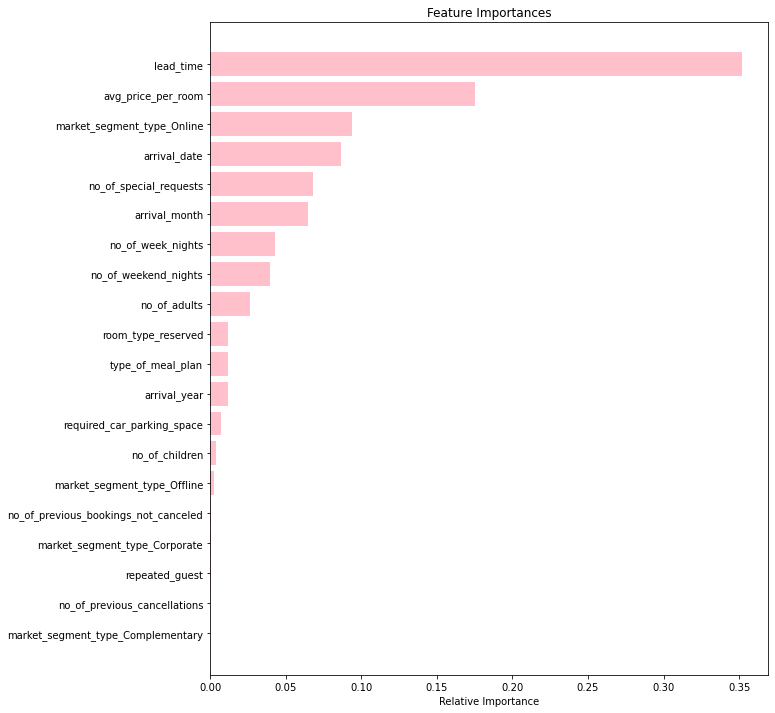

In [139]:
# plot the importance of features in the tree building in a horizontal bar plot
feature_importances = Hotel_Booking_Sklearn_Tree_Model.feature_importances_
indices = np.argsort(feature_importances)

# Set the figure size and title for the plot
plt.figure(figsize=(10, 12))
plt.title("Feature Importances")
# Display a horizontal bar plot (barh) for importance of features
plt.barh(range(len(indices)), feature_importances[indices], color="pink", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel("Relative Importance")
plt.show()

#### Observations:
* *lead_time*, *avg_price_per_room* and *market_segment_type_Online*  are the top 3 important features. 

### Decision Tree model (using GridSearch for Hyperparameter tuning)
Let's see if we can improve our model performance even more.

In [140]:
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    make_scorer,
)

In [141]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(1,15), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

In [142]:
# Set the clf to the best combination of parameters
Hotel_Booking_Hyperparam_Tuning_Tree_Model = grid_obj.best_estimator_

# Fit the best algorithm to the data.
Hotel_Booking_Hyperparam_Tuning_Tree_Model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5,
                       min_impurity_decrease=0.001, random_state=1)

#### Checking model performance on training set

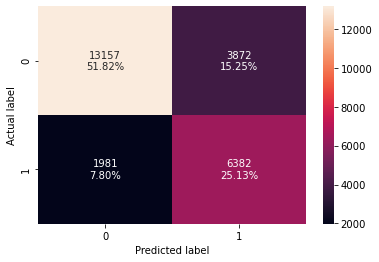

In [143]:
# creating confusion matrix
confusion_matrix_sklearn(Hotel_Booking_Hyperparam_Tuning_Tree_Model,X_train,y_train)

In [144]:
# checking model performance for this model
Hotel_Booking_Hyperparam_Tuning_Tree_Model_Train_df = model_performance_classification_sklearnmodels(
                                                                    Hotel_Booking_Hyperparam_Tuning_Tree_Model
                                                                    ,X_train
                                                                    ,y_train
                                                                )
Hotel_Booking_Hyperparam_Tuning_Tree_Model_Train_df

Accuracy    Recall  Precision       F1
0  0.769494  0.763123   0.622391  0.68561

#### Checking model performance on test set

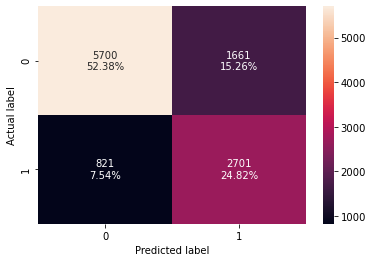

In [145]:
# creating confusion matrix
confusion_matrix_sklearn(Hotel_Booking_Hyperparam_Tuning_Tree_Model,X_test,y_test)

In [146]:
# checking model performance for this model
Hotel_Booking_Hyperparam_Tuning_Tree_Model_Test_df = model_performance_classification_sklearnmodels(
                                                                    Hotel_Booking_Hyperparam_Tuning_Tree_Model
                                                                    ,X_test
                                                                    ,y_test
                                                                )
Hotel_Booking_Hyperparam_Tuning_Tree_Model_Test_df

Accuracy    Recall  Precision        F1
0  0.771938  0.766894   0.619211  0.685185

#### Observations:
* After hyperparameter tuning the model has performance has reduced a bit, but the model has become simpler and easily understandable.

#### Visualizing the Decision Tree (GridSearch for Hyperparameter tuning)

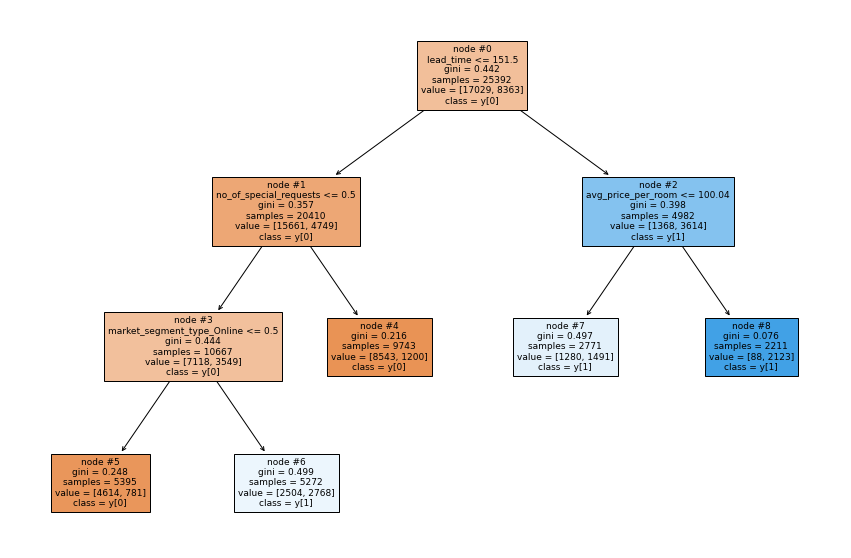

In [147]:
plt.figure(figsize=(15,10))
tree.plot_tree(Hotel_Booking_Hyperparam_Tuning_Tree_Model
               ,feature_names=feature_names
               ,filled=True
               ,fontsize=9
               ,node_ids=True
               ,class_names=True
              )
plt.show()

In [148]:
# Text report showing the rules of a decision tree
print(tree.export_text(Hotel_Booking_Hyperparam_Tuning_Tree_Model
                       ,feature_names=feature_names
                       ,show_weights=True
                      )
     )

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- weights: [4614.00, 781.00] class: 0
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- weights: [2504.00, 2768.00] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [8543.00, 1200.00] class: 0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- weights: [1280.00, 1491.00] class: 1
|   |--- avg_price_per_room >  100.04
|   |   |--- weights: [88.00, 2123.00] class: 1



In [149]:
# importance of features in the tree building ( The importance of a feature is computed as the 
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance)
pd.DataFrame(Hotel_Booking_Hyperparam_Tuning_Tree_Model.feature_importances_
             ,columns=['Importance']
             ,index=X.columns
            ).sort_values(by='Importance'
                          ,ascending=False
                         )

Importance
lead_time                               0.539970
market_segment_type_Online              0.214150
no_of_special_requests                  0.124176
avg_price_per_room                      0.121704
repeated_guest                          0.000000
market_segment_type_Offline             0.000000
market_segment_type_Corporate           0.000000
market_segment_type_Complementary       0.000000
no_of_previous_bookings_not_canceled    0.000000
no_of_previous_cancellations            0.000000
no_of_adults                            0.000000
no_of_children                          0.000000
arrival_month                           0.000000
arrival_year                            0.000000
room_type_reserved                      0.000000
required_car_parking_space              0.000000
type_of_meal_plan                       0.000000
no_of_week_nights                       0.000000
no_of_weekend_nights                    0.000000
arrival_date                            0.000000

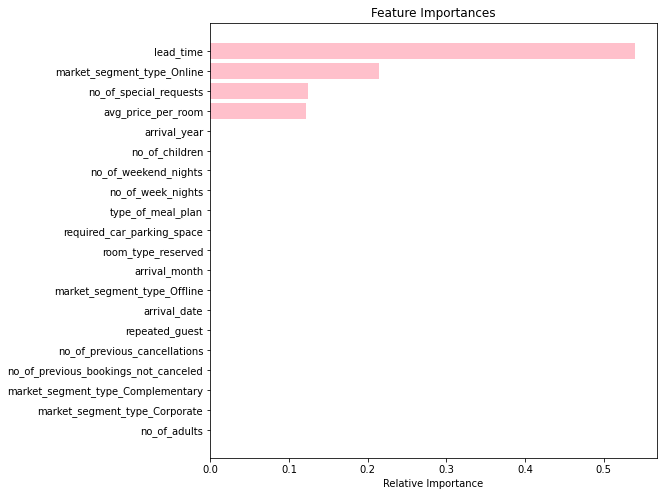

In [150]:
# plot the importance of features in the tree building in a horizontal bar plot
feature_importances = Hotel_Booking_Hyperparam_Tuning_Tree_Model.feature_importances_
indices = np.argsort(feature_importances)

# Set the figure size and title for the plot
plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
# Display a horizontal bar plot (barh) for importance of features
plt.barh(range(len(indices)), feature_importances[indices], color="pink", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel("Relative Importance")
plt.show()

#### Observations:
* We are getting a simplified tree after pre-pruning.
* *lead_time*, *market_segment_type_Online*, *no_of_special_requests* and *avg_price_per_room* are the top 4 important features. 

### Decision Tree model (Cost Complexity Pruning)

In [151]:
# building the decison tree model
clf = DecisionTreeClassifier(random_state=1)

In [152]:
# Get the path using cost_complexity_pruning_path function
path = clf.cost_complexity_pruning_path(X_train,y_train)

# Get ccp_alphas and impurities
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Display the path of the tree from leaf nodes to the root. (in reverse order)
pd.DataFrame(path).round(6)

ccp_alphas  impurities
0       0.000000    0.007572
1       0.000000    0.007573
2       0.000000    0.007573
3       0.000001    0.007574
4       0.000001    0.007575
...          ...         ...
1331    0.006666    0.286897
1332    0.013045    0.299942
1333    0.017260    0.317202
1334    0.023990    0.365183
1335    0.076578    0.441761

[1336 rows x 2 columns]

Observations:
* The leaf nodes at the end of the tree will have less impurity and the root node will have high impurity.
* There are 1335 leaf nodes for this tree and one root node with ccp_aplha = 0.076578.

#### Plotting total impurity vs effective alpha for training set

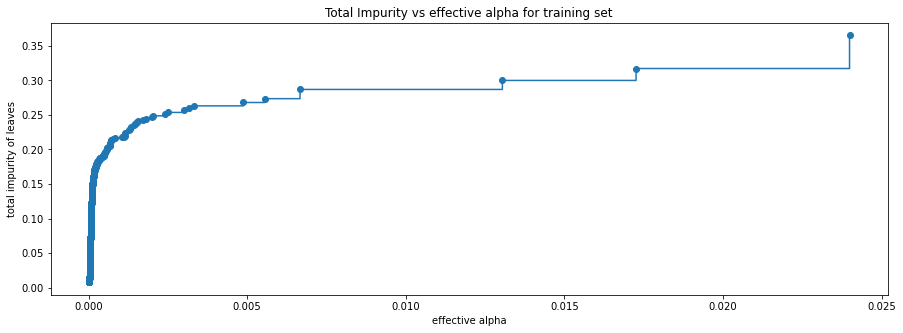

In [153]:
# using [:-1] to avoid the root node.

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

#### Observarions:
* Note that the impurity of leaf nodes increase as the alpha increases.

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [154]:
# Get the combination of all possible decision trees by pruning them at different nodes and measure the impurity.
# Also print the number of nodes, ccp_alpha and depth of each possible tree.
clfs = []
i = 0
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    i = i + 1
    print("Number of nodes in the tree # {} is: {} with ccp_alpha: {} and depth of {}"
          .format(i,clfs[-1].tree_.node_count, ccp_alpha, clfs[-1].tree_.max_depth))

Number of nodes in the tree # 1 is: 5895 with ccp_alpha: 0.0 and depth of 38
Number of nodes in the tree # 2 is: 5893 with ccp_alpha: 4.3277453485397657e-07 and depth of 38
Number of nodes in the tree # 3 is: 5891 with ccp_alpha: 4.6883907942507803e-07 and depth of 38
Number of nodes in the tree # 4 is: 5889 with ccp_alpha: 5.329960060833014e-07 and depth of 38
Number of nodes in the tree # 5 is: 5885 with ccp_alpha: 6.133546944328441e-07 and depth of 38
Number of nodes in the tree # 6 is: 5883 with ccp_alpha: 7.77285842204801e-07 and depth of 38
Number of nodes in the tree # 7 is: 5881 with ccp_alpha: 1.0939578519918804e-06 and depth of 38
Number of nodes in the tree # 8 is: 5877 with ccp_alpha: 1.2502375451335708e-06 and depth of 38
Number of nodes in the tree # 9 is: 5875 with ccp_alpha: 1.480544461342418e-06 and depth of 38
Number of nodes in the tree # 10 is: 5873 with ccp_alpha: 1.7310981394157436e-06 and depth of 38
Number of nodes in the tree # 11 is: 5871 with ccp_alpha: 1.758

Number of nodes in the tree # 87 is: 5639 with ccp_alpha: 1.9691241335853813e-05 and depth of 38
Number of nodes in the tree # 88 is: 5639 with ccp_alpha: 1.9691241335853813e-05 and depth of 38
Number of nodes in the tree # 89 is: 5637 with ccp_alpha: 2.0168604762177498e-05 and depth of 38
Number of nodes in the tree # 90 is: 5635 with ccp_alpha: 2.0253848231163962e-05 and depth of 38
Number of nodes in the tree # 91 is: 5633 with ccp_alpha: 2.0972937780256134e-05 and depth of 38
Number of nodes in the tree # 92 is: 5629 with ccp_alpha: 2.1003990758244064e-05 and depth of 38
Number of nodes in the tree # 93 is: 5627 with ccp_alpha: 2.1879157039837567e-05 and depth of 38
Number of nodes in the tree # 94 is: 5621 with ccp_alpha: 2.187915703983757e-05 and depth of 38
Number of nodes in the tree # 95 is: 5619 with ccp_alpha: 2.1879157039837594e-05 and depth of 38
Number of nodes in the tree # 96 is: 5609 with ccp_alpha: 2.219117284457959e-05 and depth of 38
Number of nodes in the tree # 97

Number of nodes in the tree # 173 is: 5199 with ccp_alpha: 2.746129872783941e-05 and depth of 38
Number of nodes in the tree # 174 is: 5197 with ccp_alpha: 2.8130344765505455e-05 and depth of 38
Number of nodes in the tree # 175 is: 5187 with ccp_alpha: 2.864180557942373e-05 and depth of 38
Number of nodes in the tree # 176 is: 5183 with ccp_alpha: 2.9536862003780716e-05 and depth of 38
Number of nodes in the tree # 177 is: 5183 with ccp_alpha: 2.9536862003780716e-05 and depth of 38
Number of nodes in the tree # 178 is: 5135 with ccp_alpha: 2.953686200378072e-05 and depth of 38
Number of nodes in the tree # 179 is: 5135 with ccp_alpha: 2.953686200378072e-05 and depth of 38
Number of nodes in the tree # 180 is: 5135 with ccp_alpha: 2.953686200378072e-05 and depth of 38
Number of nodes in the tree # 181 is: 5135 with ccp_alpha: 2.953686200378072e-05 and depth of 38
Number of nodes in the tree # 182 is: 5135 with ccp_alpha: 2.953686200378072e-05 and depth of 38
Number of nodes in the tree

Number of nodes in the tree # 258 is: 4757 with ccp_alpha: 3.445967233774417e-05 and depth of 38
Number of nodes in the tree # 259 is: 4757 with ccp_alpha: 3.445967233774417e-05 and depth of 38
Number of nodes in the tree # 260 is: 4757 with ccp_alpha: 3.445967233774417e-05 and depth of 38
Number of nodes in the tree # 261 is: 4757 with ccp_alpha: 3.445967233774417e-05 and depth of 38
Number of nodes in the tree # 262 is: 4757 with ccp_alpha: 3.445967233774417e-05 and depth of 38
Number of nodes in the tree # 263 is: 4749 with ccp_alpha: 3.448613905996978e-05 and depth of 38
Number of nodes in the tree # 264 is: 4741 with ccp_alpha: 3.4650478939835784e-05 and depth of 38
Number of nodes in the tree # 265 is: 4737 with ccp_alpha: 3.469409187745672e-05 and depth of 38
Number of nodes in the tree # 266 is: 4689 with ccp_alpha: 3.500665126374011e-05 and depth of 38
Number of nodes in the tree # 267 is: 4689 with ccp_alpha: 3.500665126374011e-05 and depth of 38
Number of nodes in the tree #

Number of nodes in the tree # 344 is: 4361 with ccp_alpha: 3.63530609277301e-05 and depth of 38
Number of nodes in the tree # 345 is: 4361 with ccp_alpha: 3.63530609277301e-05 and depth of 38
Number of nodes in the tree # 346 is: 4357 with ccp_alpha: 3.6395266493822736e-05 and depth of 38
Number of nodes in the tree # 347 is: 4349 with ccp_alpha: 3.6556563307003955e-05 and depth of 38
Number of nodes in the tree # 348 is: 4329 with ccp_alpha: 3.656944819515709e-05 and depth of 38
Number of nodes in the tree # 349 is: 4329 with ccp_alpha: 3.656944819515709e-05 and depth of 38
Number of nodes in the tree # 350 is: 4329 with ccp_alpha: 3.656944819515709e-05 and depth of 38
Number of nodes in the tree # 351 is: 4329 with ccp_alpha: 3.656944819515709e-05 and depth of 38
Number of nodes in the tree # 352 is: 4329 with ccp_alpha: 3.656944819515709e-05 and depth of 38
Number of nodes in the tree # 353 is: 4279 with ccp_alpha: 3.6676930738052384e-05 and depth of 38
Number of nodes in the tree #

Number of nodes in the tree # 429 is: 3865 with ccp_alpha: 3.9382482671707626e-05 and depth of 38
Number of nodes in the tree # 430 is: 3865 with ccp_alpha: 3.9382482671707626e-05 and depth of 38
Number of nodes in the tree # 431 is: 3865 with ccp_alpha: 3.9382482671707626e-05 and depth of 38
Number of nodes in the tree # 432 is: 3865 with ccp_alpha: 3.9382482671707626e-05 and depth of 38
Number of nodes in the tree # 433 is: 3861 with ccp_alpha: 3.938248267170763e-05 and depth of 38
Number of nodes in the tree # 434 is: 3851 with ccp_alpha: 3.9404361828747476e-05 and depth of 38
Number of nodes in the tree # 435 is: 3839 with ccp_alpha: 3.9713427904242974e-05 and depth of 38
Number of nodes in the tree # 436 is: 3835 with ccp_alpha: 3.986460932524358e-05 and depth of 38
Number of nodes in the tree # 437 is: 3831 with ccp_alpha: 4.011267459966339e-05 and depth of 38
Number of nodes in the tree # 438 is: 3829 with ccp_alpha: 4.050769646232784e-05 and depth of 38
Number of nodes in the t

Number of nodes in the tree # 515 is: 3371 with ccp_alpha: 4.79438919481658e-05 and depth of 38
Number of nodes in the tree # 516 is: 3369 with ccp_alpha: 4.833304691527753e-05 and depth of 38
Number of nodes in the tree # 517 is: 3363 with ccp_alpha: 4.863904911163888e-05 and depth of 38
Number of nodes in the tree # 518 is: 3359 with ccp_alpha: 4.8759264260209464e-05 and depth of 38
Number of nodes in the tree # 519 is: 3347 with ccp_alpha: 4.8770897382883215e-05 and depth of 38
Number of nodes in the tree # 520 is: 3341 with ccp_alpha: 4.9009311769236165e-05 and depth of 38
Number of nodes in the tree # 521 is: 3325 with ccp_alpha: 4.9060505863787844e-05 and depth of 38
Number of nodes in the tree # 522 is: 3321 with ccp_alpha: 4.909855569926706e-05 and depth of 38
Number of nodes in the tree # 523 is: 3315 with ccp_alpha: 4.920394801604264e-05 and depth of 38
Number of nodes in the tree # 524 is: 3313 with ccp_alpha: 4.922810333963452e-05 and depth of 38
Number of nodes in the tree

Number of nodes in the tree # 601 is: 2957 with ccp_alpha: 5.250997689561016e-05 and depth of 38
Number of nodes in the tree # 602 is: 2957 with ccp_alpha: 5.250997689561016e-05 and depth of 38
Number of nodes in the tree # 603 is: 2957 with ccp_alpha: 5.250997689561016e-05 and depth of 38
Number of nodes in the tree # 604 is: 2957 with ccp_alpha: 5.250997689561016e-05 and depth of 38
Number of nodes in the tree # 605 is: 2957 with ccp_alpha: 5.250997689561016e-05 and depth of 38
Number of nodes in the tree # 606 is: 2957 with ccp_alpha: 5.250997689561016e-05 and depth of 38
Number of nodes in the tree # 607 is: 2957 with ccp_alpha: 5.250997689561016e-05 and depth of 38
Number of nodes in the tree # 608 is: 2957 with ccp_alpha: 5.250997689561016e-05 and depth of 38
Number of nodes in the tree # 609 is: 2957 with ccp_alpha: 5.250997689561016e-05 and depth of 38
Number of nodes in the tree # 610 is: 2957 with ccp_alpha: 5.250997689561016e-05 and depth of 38
Number of nodes in the tree # 

Number of nodes in the tree # 686 is: 2521 with ccp_alpha: 5.907372400756144e-05 and depth of 38
Number of nodes in the tree # 687 is: 2521 with ccp_alpha: 5.907372400756144e-05 and depth of 38
Number of nodes in the tree # 688 is: 2521 with ccp_alpha: 5.907372400756144e-05 and depth of 38
Number of nodes in the tree # 689 is: 2521 with ccp_alpha: 5.907372400756144e-05 and depth of 38
Number of nodes in the tree # 690 is: 2521 with ccp_alpha: 5.907372400756144e-05 and depth of 38
Number of nodes in the tree # 691 is: 2521 with ccp_alpha: 5.907372400756144e-05 and depth of 38
Number of nodes in the tree # 692 is: 2521 with ccp_alpha: 5.907372400756144e-05 and depth of 38
Number of nodes in the tree # 693 is: 2521 with ccp_alpha: 5.907372400756144e-05 and depth of 38
Number of nodes in the tree # 694 is: 2521 with ccp_alpha: 5.907372400756144e-05 and depth of 38
Number of nodes in the tree # 695 is: 2521 with ccp_alpha: 5.907372400756144e-05 and depth of 38
Number of nodes in the tree # 

Number of nodes in the tree # 771 is: 2237 with ccp_alpha: 6.265706613288787e-05 and depth of 38
Number of nodes in the tree # 772 is: 2231 with ccp_alpha: 6.301153352158296e-05 and depth of 38
Number of nodes in the tree # 773 is: 2165 with ccp_alpha: 6.301197227473218e-05 and depth of 38
Number of nodes in the tree # 774 is: 2165 with ccp_alpha: 6.301197227473218e-05 and depth of 38
Number of nodes in the tree # 775 is: 2165 with ccp_alpha: 6.301197227473218e-05 and depth of 38
Number of nodes in the tree # 776 is: 2165 with ccp_alpha: 6.301197227473218e-05 and depth of 38
Number of nodes in the tree # 777 is: 2165 with ccp_alpha: 6.301197227473218e-05 and depth of 38
Number of nodes in the tree # 778 is: 2165 with ccp_alpha: 6.301197227473218e-05 and depth of 38
Number of nodes in the tree # 779 is: 2165 with ccp_alpha: 6.301197227473218e-05 and depth of 38
Number of nodes in the tree # 780 is: 2165 with ccp_alpha: 6.301197227473218e-05 and depth of 38
Number of nodes in the tree # 

Number of nodes in the tree # 856 is: 1977 with ccp_alpha: 6.715749676649089e-05 and depth of 38
Number of nodes in the tree # 857 is: 1965 with ccp_alpha: 6.723039541889118e-05 and depth of 38
Number of nodes in the tree # 858 is: 1961 with ccp_alpha: 6.724128263103018e-05 and depth of 38
Number of nodes in the tree # 859 is: 1959 with ccp_alpha: 6.739248371629108e-05 and depth of 38
Number of nodes in the tree # 860 is: 1955 with ccp_alpha: 6.742758396822667e-05 and depth of 38
Number of nodes in the tree # 861 is: 1945 with ccp_alpha: 6.745512416589923e-05 and depth of 38
Number of nodes in the tree # 862 is: 1927 with ccp_alpha: 6.751282743721308e-05 and depth of 38
Number of nodes in the tree # 863 is: 1927 with ccp_alpha: 6.751282743721308e-05 and depth of 38
Number of nodes in the tree # 864 is: 1927 with ccp_alpha: 6.751282743721308e-05 and depth of 38
Number of nodes in the tree # 865 is: 1927 with ccp_alpha: 6.751282743721308e-05 and depth of 38
Number of nodes in the tree # 

Number of nodes in the tree # 942 is: 1633 with ccp_alpha: 7.278037238840085e-05 and depth of 37
Number of nodes in the tree # 943 is: 1613 with ccp_alpha: 7.296772508176741e-05 and depth of 37
Number of nodes in the tree # 944 is: 1609 with ccp_alpha: 7.313889639031418e-05 and depth of 37
Number of nodes in the tree # 945 is: 1609 with ccp_alpha: 7.313889639031418e-05 and depth of 37
Number of nodes in the tree # 946 is: 1605 with ccp_alpha: 7.32000493137174e-05 and depth of 37
Number of nodes in the tree # 947 is: 1599 with ccp_alpha: 7.33034013304633e-05 and depth of 37
Number of nodes in the tree # 948 is: 1595 with ccp_alpha: 7.35139676538542e-05 and depth of 37
Number of nodes in the tree # 949 is: 1595 with ccp_alpha: 7.35139676538542e-05 and depth of 37
Number of nodes in the tree # 950 is: 1591 with ccp_alpha: 7.351396765385425e-05 and depth of 37
Number of nodes in the tree # 951 is: 1591 with ccp_alpha: 7.351396765385425e-05 and depth of 37
Number of nodes in the tree # 952 

Number of nodes in the tree # 1027 is: 1229 with ccp_alpha: 8.401596303297628e-05 and depth of 29
Number of nodes in the tree # 1028 is: 1225 with ccp_alpha: 8.405202757754738e-05 and depth of 29
Number of nodes in the tree # 1029 is: 1219 with ccp_alpha: 8.42949296509617e-05 and depth of 29
Number of nodes in the tree # 1030 is: 1217 with ccp_alpha: 8.439103429651632e-05 and depth of 29
Number of nodes in the tree # 1031 is: 1211 with ccp_alpha: 8.47591597959167e-05 and depth of 29
Number of nodes in the tree # 1032 is: 1205 with ccp_alpha: 8.480778014489422e-05 and depth of 29
Number of nodes in the tree # 1033 is: 1203 with ccp_alpha: 8.532871245536652e-05 and depth of 29
Number of nodes in the tree # 1034 is: 1201 with ccp_alpha: 8.552896236725628e-05 and depth of 29
Number of nodes in the tree # 1035 is: 1197 with ccp_alpha: 8.605411766203489e-05 and depth of 29
Number of nodes in the tree # 1036 is: 1193 with ccp_alpha: 8.616409845143308e-05 and depth of 29
Number of nodes in the

Number of nodes in the tree # 1111 is: 833 with ccp_alpha: 0.0001054205980954563 and depth of 27
Number of nodes in the tree # 1112 is: 831 with ccp_alpha: 0.00010542300765660874 and depth of 27
Number of nodes in the tree # 1113 is: 825 with ccp_alpha: 0.00010576236248204089 and depth of 27
Number of nodes in the tree # 1114 is: 823 with ccp_alpha: 0.00010626524968597792 and depth of 27
Number of nodes in the tree # 1115 is: 821 with ccp_alpha: 0.0001063327032136106 and depth of 27
Number of nodes in the tree # 1116 is: 815 with ccp_alpha: 0.00010637544848936312 and depth of 27
Number of nodes in the tree # 1117 is: 811 with ccp_alpha: 0.00010648765384191323 and depth of 27
Number of nodes in the tree # 1118 is: 809 with ccp_alpha: 0.00010654079069543796 and depth of 27
Number of nodes in the tree # 1119 is: 795 with ccp_alpha: 0.00010722456330783578 and depth of 27
Number of nodes in the tree # 1120 is: 789 with ccp_alpha: 0.00010805180004239597 and depth of 27
Number of nodes in the

Number of nodes in the tree # 1195 is: 453 with ccp_alpha: 0.0001460430386972302 and depth of 16
Number of nodes in the tree # 1196 is: 451 with ccp_alpha: 0.00014634036786504107 and depth of 16
Number of nodes in the tree # 1197 is: 449 with ccp_alpha: 0.00014781217522238314 and depth of 16
Number of nodes in the tree # 1198 is: 447 with ccp_alpha: 0.0001482634641758405 and depth of 16
Number of nodes in the tree # 1199 is: 445 with ccp_alpha: 0.00014841790528435694 and depth of 16
Number of nodes in the tree # 1200 is: 443 with ccp_alpha: 0.0001485282203618687 and depth of 16
Number of nodes in the tree # 1201 is: 441 with ccp_alpha: 0.0001499243445948293 and depth of 16
Number of nodes in the tree # 1202 is: 439 with ccp_alpha: 0.000150106742572496 and depth of 16
Number of nodes in the tree # 1203 is: 437 with ccp_alpha: 0.00015072551284744094 and depth of 16
Number of nodes in the tree # 1204 is: 435 with ccp_alpha: 0.0001526036314724033 and depth of 16
Number of nodes in the tree

Number of nodes in the tree # 1280 is: 173 with ccp_alpha: 0.00037339441740058023 and depth of 13
Number of nodes in the tree # 1281 is: 171 with ccp_alpha: 0.0004022166207629666 and depth of 13
Number of nodes in the tree # 1282 is: 169 with ccp_alpha: 0.00042088556624679876 and depth of 13
Number of nodes in the tree # 1283 is: 167 with ccp_alpha: 0.0004240539745104762 and depth of 13
Number of nodes in the tree # 1284 is: 163 with ccp_alpha: 0.00042698709711536543 and depth of 13
Number of nodes in the tree # 1285 is: 161 with ccp_alpha: 0.00044410700549150526 and depth of 13
Number of nodes in the tree # 1286 is: 159 with ccp_alpha: 0.00046274417139256476 and depth of 13
Number of nodes in the tree # 1287 is: 157 with ccp_alpha: 0.00048546418214213223 and depth of 13
Number of nodes in the tree # 1288 is: 153 with ccp_alpha: 0.0004877401982383491 and depth of 13
Number of nodes in the tree # 1289 is: 147 with ccp_alpha: 0.0004895739149983168 and depth of 11
Number of nodes in the t

In [155]:
# For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. 
# Here we show that the number of nodes and tree depth decreases as alpha increases.
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

#### Plotting Number of nodes vs alpha and Depth vs alpha

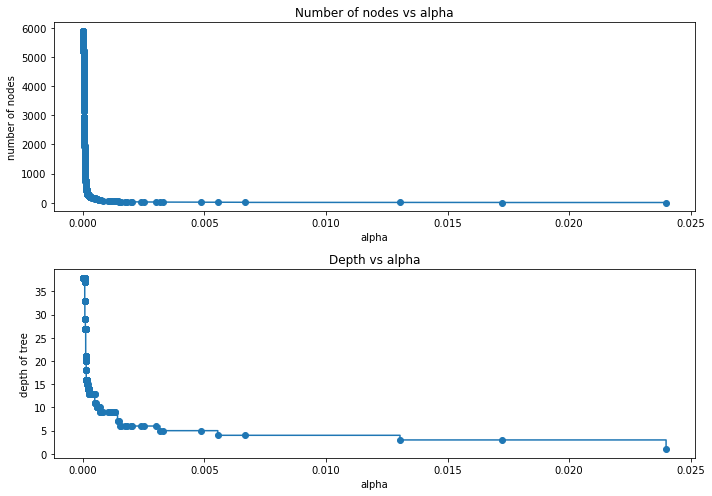

In [156]:
# get node counts and depth of each possible tree
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

# plotting Number of nodes vs alpha and Depth vs alpha
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### Accuracy vs alpha for training and testing sets
When ccp_alpha is set to zero and keeping the other default parameters of DecisionTreeClassifier, the tree overfits. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better.

In [157]:
# Get train and test accuracy scores for each possible tree.
train_accuracy_scores = [clf.score(X_train,y_train) for clf in clfs]
test_accuracy_scores = [clf.score(X_test,y_test) for clf in clfs]

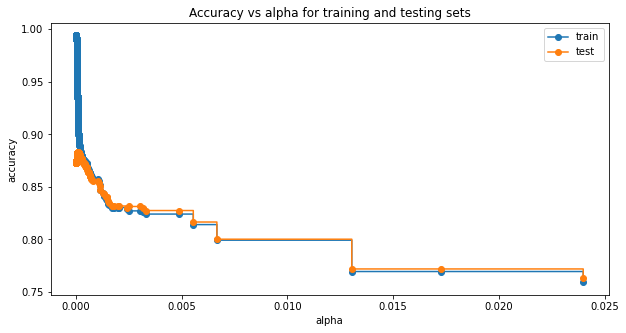

In [158]:
# plotting Accuracy vs alpha for training and testing sets
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_accuracy_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_accuracy_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [159]:
index_best_model_accuracy = np.argmax(test_accuracy_scores)
best_model_accuracy = clfs[index_best_model_accuracy]
print(best_model_accuracy)
print('Training accuracy of best model: ',best_model_accuracy.score(X_train, y_train))
print('Test accuracy of best model: ',best_model_accuracy.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.00011799258961568554, random_state=1)
Training accuracy of best model:  0.9016225582860744
Test accuracy of best model:  0.8832123495359735


Since accuracy isn't the metric we are looking for, we would try to find a model with high recall

#### Recall vs alpha for training and testing sets

In [160]:
# get the training recall for each possible tree
recall_train = []
for clf in clfs:
    y_train_pred = clf.predict(X_train)
    recall_value_train = recall_score(y_train,y_train_pred)
    recall_train.append(recall_value_train)

In [161]:
# get the training recall for each possible tree
recall_test = []
for clf in clfs:
    y_test_pred = clf.predict(X_test)
    recall_value_test = recall_score(y_test,y_test_pred)
    recall_test.append(recall_value_test)

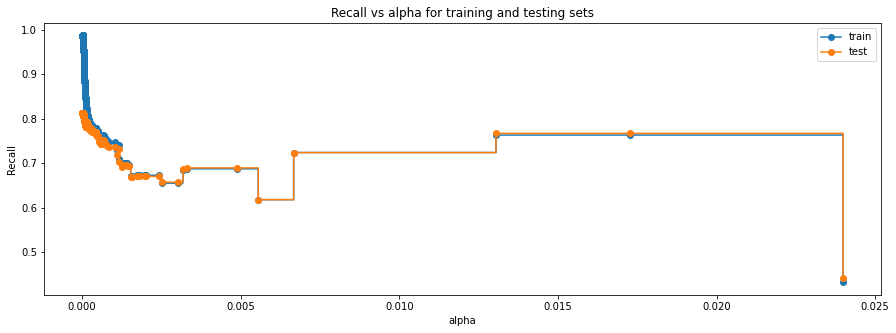

In [162]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [163]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=2.4891092944023008e-05, random_state=1)


#### Observations:
This dataset is giving highest recall for low alpha values, which is unusual. Maximum value of Recall is at **0.000024 alpha**, but if we choose decision tree will have a thousand nodes. We would lose the buisness rules and the tree will be hard to understand, instead we can **choose alpha 0.00666** and get a good recall.**


In [164]:
# creating the model where we get highest test recall
index_best_model_recall = 1331 # I got this from the step where I printed all the trees.
print("index_best_model_recall:",index_best_model_recall)
Hotel_Booking_Best_Cost_Comp_Tree_Model = clfs[index_best_model_recall]
print(Hotel_Booking_Best_Cost_Comp_Tree_Model)
print('Training recall of best model: ',recall_train[index_best_model_recall])
print('Test recall of best model: ',recall_test[index_best_model_recall])

index_best_model_recall: 1331
DecisionTreeClassifier(ccp_alpha=0.006665683999430263, random_state=1)
Training recall of best model:  0.7239029056558651
Test recall of best model:  0.7237365133446905


#### Checking model performance on training set

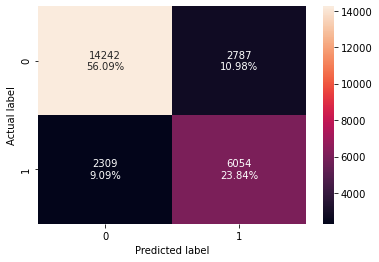

In [165]:
# creating confusion matrix
confusion_matrix_sklearn(Hotel_Booking_Best_Cost_Comp_Tree_Model,X_train,y_train)

In [166]:
# checking model performance for this model
Hotel_Booking_Best_Cost_Comp_Tree_Model_Train_df = model_performance_classification_sklearnmodels(
                                                                    Hotel_Booking_Best_Cost_Comp_Tree_Model
                                                                    ,X_train
                                                                    ,y_train
                                                                )
Hotel_Booking_Best_Cost_Comp_Tree_Model_Train_df

Accuracy    Recall  Precision       F1
0  0.799307  0.723903   0.684764  0.70379

#### Checking model performance on test set

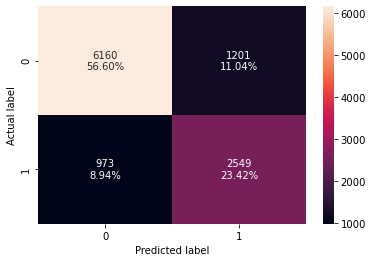

In [167]:
# creating confusion matrix
confusion_matrix_sklearn(Hotel_Booking_Best_Cost_Comp_Tree_Model,X_test,y_test)

In [168]:
# checking model performance for this model
Hotel_Booking_Best_Cost_Comp_Tree_Model_Test_df = model_performance_classification_sklearnmodels(
                                                                    Hotel_Booking_Best_Cost_Comp_Tree_Model
                                                                    ,X_test
                                                                    ,y_test
                                                                )
Hotel_Booking_Best_Cost_Comp_Tree_Model_Test_df

Accuracy    Recall  Precision        F1
0  0.800239  0.723737   0.679733  0.701045

#### Observations:
* The results have not improved from the initial model.
* The performance is comparable to the hyperparameter tuned model with more acceptable recall and precision values.
* The model is giving a generalized performance on training and test set.

#### Visualizing the Decision Tree (Cost Complexity Pruned decision tree)

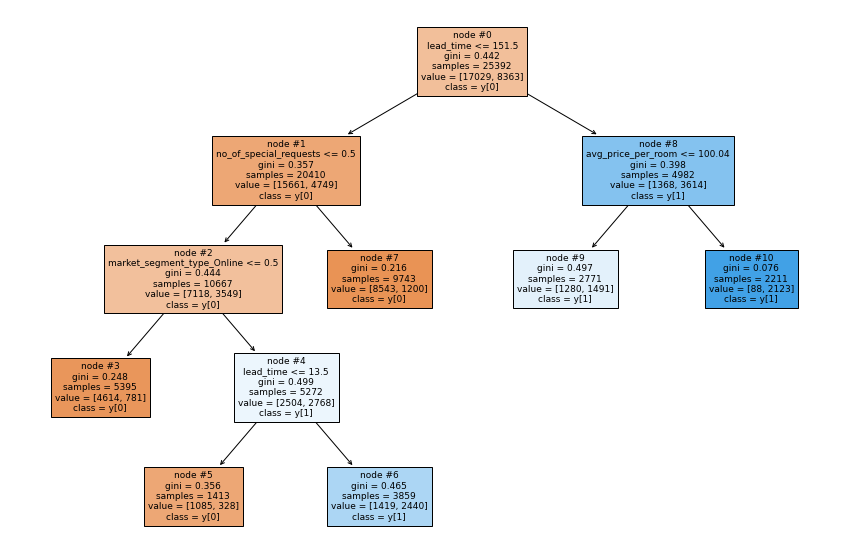

In [169]:
plt.figure(figsize=(15,10))
tree.plot_tree(Hotel_Booking_Best_Cost_Comp_Tree_Model
               ,feature_names=feature_names
               ,filled=True
               ,fontsize=9
               ,node_ids=True
               ,class_names=True
              )
plt.show()

In [170]:
# Text report showing the rules of a decision tree
print(tree.export_text(Hotel_Booking_Best_Cost_Comp_Tree_Model
                       ,feature_names=feature_names
                       ,show_weights=True
                      )
     )

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- weights: [4614.00, 781.00] class: 0
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- lead_time <= 13.50
|   |   |   |   |--- weights: [1085.00, 328.00] class: 0
|   |   |   |--- lead_time >  13.50
|   |   |   |   |--- weights: [1419.00, 2440.00] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [8543.00, 1200.00] class: 0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- weights: [1280.00, 1491.00] class: 1
|   |--- avg_price_per_room >  100.04
|   |   |--- weights: [88.00, 2123.00] class: 1



In [171]:
# importance of features in the tree building ( The importance of a feature is computed as the 
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance)
pd.DataFrame(Hotel_Booking_Best_Cost_Comp_Tree_Model.feature_importances_
             ,columns=['Importance']
             ,index=X.columns
            ).sort_values(by='Importance'
                          ,ascending=False
                         )

Importance
lead_time                               0.578720
market_segment_type_Online              0.196111
no_of_special_requests                  0.113716
avg_price_per_room                      0.111452
repeated_guest                          0.000000
market_segment_type_Offline             0.000000
market_segment_type_Corporate           0.000000
market_segment_type_Complementary       0.000000
no_of_previous_bookings_not_canceled    0.000000
no_of_previous_cancellations            0.000000
no_of_adults                            0.000000
no_of_children                          0.000000
arrival_month                           0.000000
arrival_year                            0.000000
room_type_reserved                      0.000000
required_car_parking_space              0.000000
type_of_meal_plan                       0.000000
no_of_week_nights                       0.000000
no_of_weekend_nights                    0.000000
arrival_date                            0.000000

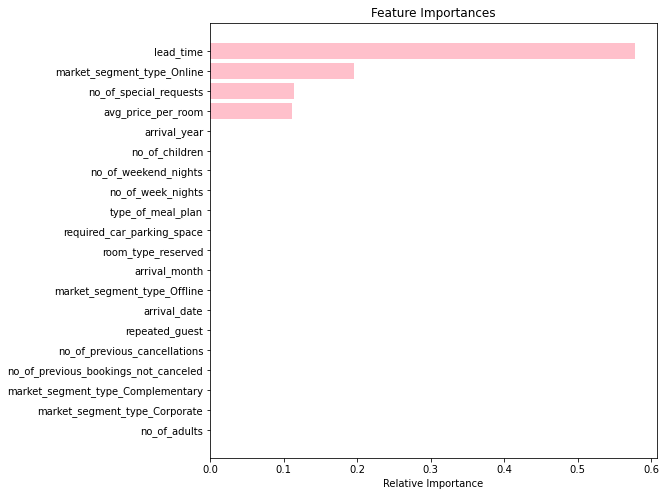

In [172]:
# plot the importance of features in the tree building in a horizontal bar plot
feature_importances = Hotel_Booking_Best_Cost_Comp_Tree_Model.feature_importances_
indices = np.argsort(feature_importances)

# Set the figure size and title for the plot
plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
# Display a horizontal bar plot (barh) for importance of features
plt.barh(range(len(indices)), feature_importances[indices], color="pink", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel("Relative Importance")
plt.show()

#### Observations:
* We are getting a simplified tree after post-pruning.
* *lead_time*, *market_segment_type_Online*, *no_of_special_requests* and *avg_price_per_room* are the top 4 important features. 

## <a name='link6'>**7. Decision tree models - Performance Summary - Train and Test**</a>

#### Model Performance Summary - Training set

In [173]:
# training performance comparison
hotel_booking_dec_tree_models_train_compare_df = pd.concat(
    [
        Hotel_Booking_Sklearn_Tree_Model_Train_df.T,
        Hotel_Booking_Hyperparam_Tuning_Tree_Model_Train_df.T,
        Hotel_Booking_Best_Cost_Comp_Tree_Model_Train_df.T,
    ],axis=1
)
hotel_booking_dec_tree_models_train_compare_df.columns=[
    "Decision Tree-Sklearn",
    "Decision Tree(Pre-Pruning)-using GridSearch for Hyperparameter tuning",
    "Decision Tree(Post-Pruning)-Cost Complexity Pruning"
]
print("Training performance comparison:")
hotel_booking_dec_tree_models_train_compare_df

Training performance comparison:


Decision Tree-Sklearn  \
Accuracy                0.994211   
Recall                  0.986608   
Precision               0.995776   
F1                      0.991171   

           Decision Tree(Pre-Pruning)-using GridSearch for Hyperparameter tuning  \
Accuracy                                            0.769494                       
Recall                                              0.763123                       
Precision                                           0.622391                       
F1                                                  0.685610                       

           Decision Tree(Post-Pruning)-Cost Complexity Pruning  
Accuracy                                            0.799307    
Recall                                              0.723903    
Precision                                           0.684764    
F1                                                  0.703790

#### Model Performance Summary - Testing set

In [174]:
# testing performance comparison
hotel_booking_dec_tree_models_test_compare_df = pd.concat(
    [
        Hotel_Booking_Sklearn_Tree_Model_Test_df.T,
        Hotel_Booking_Hyperparam_Tuning_Tree_Model_Test_df.T,
        Hotel_Booking_Best_Cost_Comp_Tree_Model_Test_df.T,
    ],axis=1
)
hotel_booking_dec_tree_models_test_compare_df.columns=[
    "Decision Tree-Sklearn",
    "Decision Tree(Pre-Pruning)-using GridSearch for Hyperparameter tuning",
    "Decision Tree(Post-Pruning)-Cost Complexity Pruning"
]
print("Testing performance comparison:")
hotel_booking_dec_tree_models_test_compare_df

Testing performance comparison:


Decision Tree-Sklearn  \
Accuracy                0.872921   
Recall                  0.812039   
Precision               0.798660   
F1                      0.805294   

           Decision Tree(Pre-Pruning)-using GridSearch for Hyperparameter tuning  \
Accuracy                                            0.771938                       
Recall                                              0.766894                       
Precision                                           0.619211                       
F1                                                  0.685185                       

           Decision Tree(Post-Pruning)-Cost Complexity Pruning  
Accuracy                                            0.800239    
Recall                                              0.723737    
Precision                                           0.679733    
F1                                                  0.701045

### Conclusion
1. The sklearn model is an overfit model, but the other 2 pruned models are giving a generalized performance on training and test set.
2. The highest recall is 76.7% on the testing set using GridSearch for Hyperparameter tuning.
3. Using the model with sklearn is overfit and is hard to interpret business rules from it.
4. Using the model with using GridSearch for Hyperparameter tuning will give a high recall but low precision scores - This model will help the hotel identify non-cancelling customers effectively but the cost of resources will be high.
5. Using the model with Cost Complexity Pruning will give a balance recall and precision score - This model will help the hotel to maintain a balance in identifying potential non-cancelling customers and the cost of resources.

## <a name='link7'>**8. Actionable Insights and Recommendations**</a>

### Insights from the Decision Tree model
1. Lead time is a major factor that influences the cancellation of a hotel booking. Higher the lead time of booking, higher the chance of cancellation.
2. Online market segment also influences the cancellation of a hotel booking. If the market segment is online, higher the chance of cancellation than any other segments.
3. The more the number of special requests are accommodated by hotel, the lesser the chance of cancellation.
4. Bookings with lower average price per room have lesser chance of getting cancelled. Higher the price, higher the chance of getting cancelled.

### Insights from the Logistic Regression model
1. Repeated Guest has a negative correlation to cancellation. So if the guest is a regular customer, there is a less chance of cancellation.
2. Market segments Offline and Corporate has negative correlation to cancellation. So if the guest is from Offline or Corporate market segment, there is a less chance of cancellation.
3. Required_car_parking_space has a negative correlation to cancellation. So if the guest has requested for a parking space, there is a less chance of cancellation.
4. Just like decision tree model, there is lesser chance of cancellation if the hotel can accommodate special requests from customers.
5. No_of_previous_cancellations has a positive correlation to cancellation. So if the guest has cancelled before, there are chances that he/she will cancel again.

### Business Recommendations:
1. Even though customers with higher lead time has a good chance of cancellation, INN Hotels should allow customers to book early as filling hotel rooms is also important for revenue. Now the catch is to find the customers who will cancel and have them cancel as early as possible so that the hotel can market that room again at a higher price. INN hotels should send weekly reminders (email and text) to customers about their advance booking and remind them about the consequences of not cancelling the room in advance.
2. INN hotels should try to accommodate as many special requests from customers. This will drive customer satisfaction and will reduce last minute cancellations.
3. INN hotels should try to give coupons/discounts for bookings with less lead time as these bookings with lower average prices have less chances of getting cancelled.
4. INN Hotels should try to negotiate deals with Corporates to have them book the hotel for their staff, as Corporate market segment have less chances of getting cancelled.
5. INN Hotels should initiate a reward point system to reward regular customers and provide them with room upgrades. Repeated Guests have less chances of cancelling their booking.